Ben Cappello

bencappello@gmail.com

Learning Hope

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Import necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

#Import necessary model selection tools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
# load resources.csv and train_data.csv into pandas dataframes
resources = pd.read_csv('resources.csv')
train_data = pd.read_csv('train_data.csv')

# EDA

## Initial high level data inspection

In [ ]:
resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1541272 non-null  object 
 1   description  1540980 non-null  object 
 2   quantity     1541272 non-null  int64  
 3   price        1541272 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_subject_subcategories                 109248 non-null  object
 9   project_title                                 109248 non-nu

In [ ]:
pd.set_option('display.max_columns', None)
resources.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

In [ ]:
train_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0  
3                                             4                    1  
4                                             1                    1

### Distribution of target variable

<Axes: xlabel='project_is_approved', ylabel='count'>

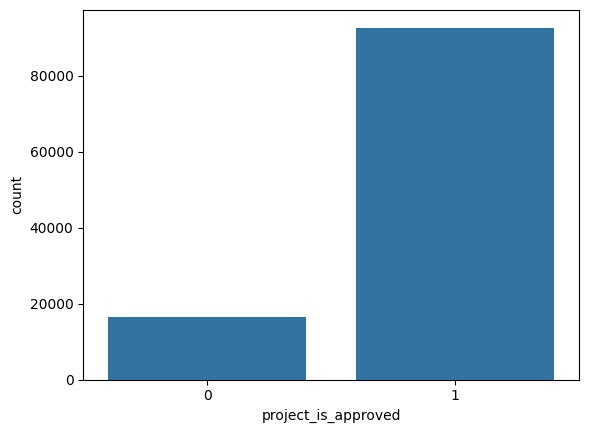

In [ ]:
sns.countplot(x=train_data['project_is_approved'])

## Initial reactions to high level data inspeciton
We've got a fairly large dataset with 109,248 rows in train_data and 1,541,272 rows in resources. resources represents a list of items that is requested for each project and train_data represents all other data for each project.

We have many categorical data columns, many free text columns, and only a few continuous numerical ones.

Most columns have no nulls which is great. Only three columns have nulls: 'description' in resources, and project_essay_3 and project_essay_4 in train_data. All three of these columns have free text values so my initial reaction is that this won't be a large issue because when we get to the stage of doing NLP we can impute empty string values for the missing data, which will allow NLP to go forward.

#### Imbalanced Target variable
Our target variable is pretty imbalanced with the majority of projects being approved so we will probably want to employ a balancing strategy later on to mitigate this effect on our model. Also we will want to look carefully at our model evaluation metrics and monitor any imbalances between them for our positive and negative classes.

## Extracting some potetial features

### Total Project Cost
We have two columns in resources, quantity and cost, which by themselves aren't really useful to us. Each row in resources represents a particular set of items that is requested for a proposed project. The column 'price' represents the price of an individual item and 'quantity' represents the number of items requested. Therefore, we should multiply these two columns together to derive the total price for each row and then we should group by 'id' (representing a unique id for each project) and get the sum to get the total cost of each project.

We will then merge that with train_data to give us a second continuous numerical column in our main data frame.

In [ ]:
# Step 1: Group by 'id' and calculate the aggregate sum of 'total_project_cost'
resources['total_project_cost']=resources['price']*resources['quantity']
summed_total_project_costs = resources.groupby('id')['total_project_cost'].sum().reset_index()

# Step 2: Merge the aggregated result with the train_data DataFrame on the 'id' column
train_data = train_data.merge(summed_total_project_costs, on='id', how='left')

### Year and Month
We have a column, 'project_submitted_datetime'. In it's current format it is not really useful to us as it is super high cardinality and we wouldn't expect to see trends at this level. However, we can extract year and month from this submission date column and see if there are any trends at that level with respect to our target variable. We will inspect further in later EDA to decide if these columns are useful for our model.

In [ ]:
train_data['year'] = pd.DatetimeIndex(train_data['project_submitted_datetime']).year
train_data['month'] = pd.DatetimeIndex(train_data['project_submitted_datetime']).month
train_data.drop('project_submitted_datetime', axis=1, inplace=True)

## Extracting Individual Project Categories and Sub-Categories
Our project_subject_categories and project_subject_subcategories columns are strings that often include multiple categories. This results in a high level of cardinality and prevents us, in it's current form, from analyzing these categories individually. It would be nice to separate these out individually and analyze distributions and the correlation with our target variable. Since when multiple categories are present they are comma separated, we can separate them, create a unique list of all of them, and execute one-hot encoding on that list (since we will likely end up doing that later anyway) so we have a separate column for each individual category. This will facilitate the analysis we want to do and set us up for modeling later since they will already be one-hot encoded.

I expect that there may be a high level of correlation between some of these categories so we can look at a correlation matrix later and decide how to do deal with that.

In [ ]:
# Step 1: Extract and split the categorical values
def extract_unique_categories(column):
    unique_categories = set()
    for entry in column:
        categories = entry.split(', ')
        unique_categories.update(categories)
    return unique_categories

# Get unique categories from both columns
subject_categories = extract_unique_categories(train_data['project_subject_categories'])
subject_subcategories = extract_unique_categories(train_data['project_subject_subcategories'])

# Combine both sets of unique categories
all_unique_subject_categories = subject_categories.union(subject_subcategories)

# Step 2: Create a set of all unique categorical values
print("All unique categories:", all_unique_subject_categories)

# Step 3: Perform one-hot encoding
# Initialize all new columns to 0
for category in all_unique_subject_categories:
    train_data[category] = 0

# Function to one-hot encode the categories
def one_hot_encode(row, column, unique_categories):
    for category in unique_categories:
        if category in row[column]:
            row[category] = 1
    return row

# Apply one-hot encoding to both columns
train_data = train_data.apply(lambda row: one_hot_encode(row, 'project_subject_categories', subject_categories), axis=1)
train_data = train_data.apply(lambda row: one_hot_encode(row, 'project_subject_subcategories', subject_subcategories), axis=1)

# Drop the original columns
train_data = train_data.drop(columns=['project_subject_categories', 'project_subject_subcategories'])

train_data.head()

All unique categories: {'Warmth', 'Financial Literacy', 'Visual Arts', 'Health & Life Science', 'Nutrition Education', 'Mathematics', 'Foreign Languages', 'Economics', 'Team Sports', 'Literacy & Language', 'History & Geography', 'Environmental Science', 'College & Career Prep', 'Music', 'Community Service', 'Math & Science', 'Literature & Writing', 'Care & Hunger', 'Special Needs', 'Music & The Arts', 'Civics & Government', 'ESL', 'Applied Learning', 'Parent Involvement', 'Applied Sciences', 'Extracurricular', 'Gym & Fitness', 'Performing Arts', 'Early Development', 'Literacy', 'Health & Wellness', 'Health & Sports', 'Social Sciences', 'Character Education', 'Other', 'History & Civics'}


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_grade_category  \
0           IN          Grades PreK-2   
1           FL             Grades 6-8   
2           AZ             Grades 6-8   
3           KY          Grades PreK-2   
4           TX          Grades PreK-2   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

   total_project_cost  year  month  Warmth  Financial Literacy  Visual Arts  \
0              596.36  2016     12       0                   0            0   
1              299.00  2016     10       0                   0            0   
2              686.68  2016      8       0                   0            0   
3              431.90  2016     10       0                   0            0   
4              143.96  2016      7       0                   0            0   

   Health & Life Science  Nutrition Education  Mathematics  Foreign Languages  \
0                      0                    0            0                  0   
1                      0                    0            0                  0   
2                      0                    0            0                  0   
3                      0                    0            1                  0   
4                      0                    0            1                  0   

   Economics  Team Sports  Literacy & Language  History & Geography  \
0          0            0                    1                    0   
1          0            1                    0                    0   
2          0            1                    0                    0   
3          0            0                    1                    0   
4          0   

## Split up columns by type to facilitate EDA.
#### Explanation of Exclusion of 'Description'
I am not including 'description' in my text columns for use with NLP later. It is simply a list of the materials requested for a project, and there is also a column, project_resource_summary, that I believe captures this sentiment as well. Furthermore, we also capture the cost of the materials requested in Total Project Cost feature.

That said, to be more thorough in the future I would include it because it is possible that it might have predicitive power as well. To include it I would simply group by 'id' and concatenate all 'description' entries for each project and create a new column within train_data. That way I could also include those text entries in NLP strategies.

In [ ]:
categorical_columns = ["teacher_prefix", "year", "month", "school_state", "project_grade_category"]
numerical_columns = ["teacher_number_of_previously_posted_projects", "total_project_cost"]
text_columns = ["project_title", "project_essay_1", "project_essay_2", "project_essay_3", "project_essay_4", "project_resource_summary"]

## EDA Categorical Columns

### Distrbution of categorical data

In [ ]:
for col in categorical_columns:
    print(col, train_data[col].value_counts())

teacher_prefix teacher_prefix
Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: count, dtype: int64
year year
2016    78966
2017    30282
Name: count, dtype: int64
month month
8     19980
9     15094
1      9013
11     8910
10     8556
3      8502
7      7760
2      7159
12     6627
4      6448
5      5722
6      5477
Name: count, dtype: int64
school_state school_state
CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143

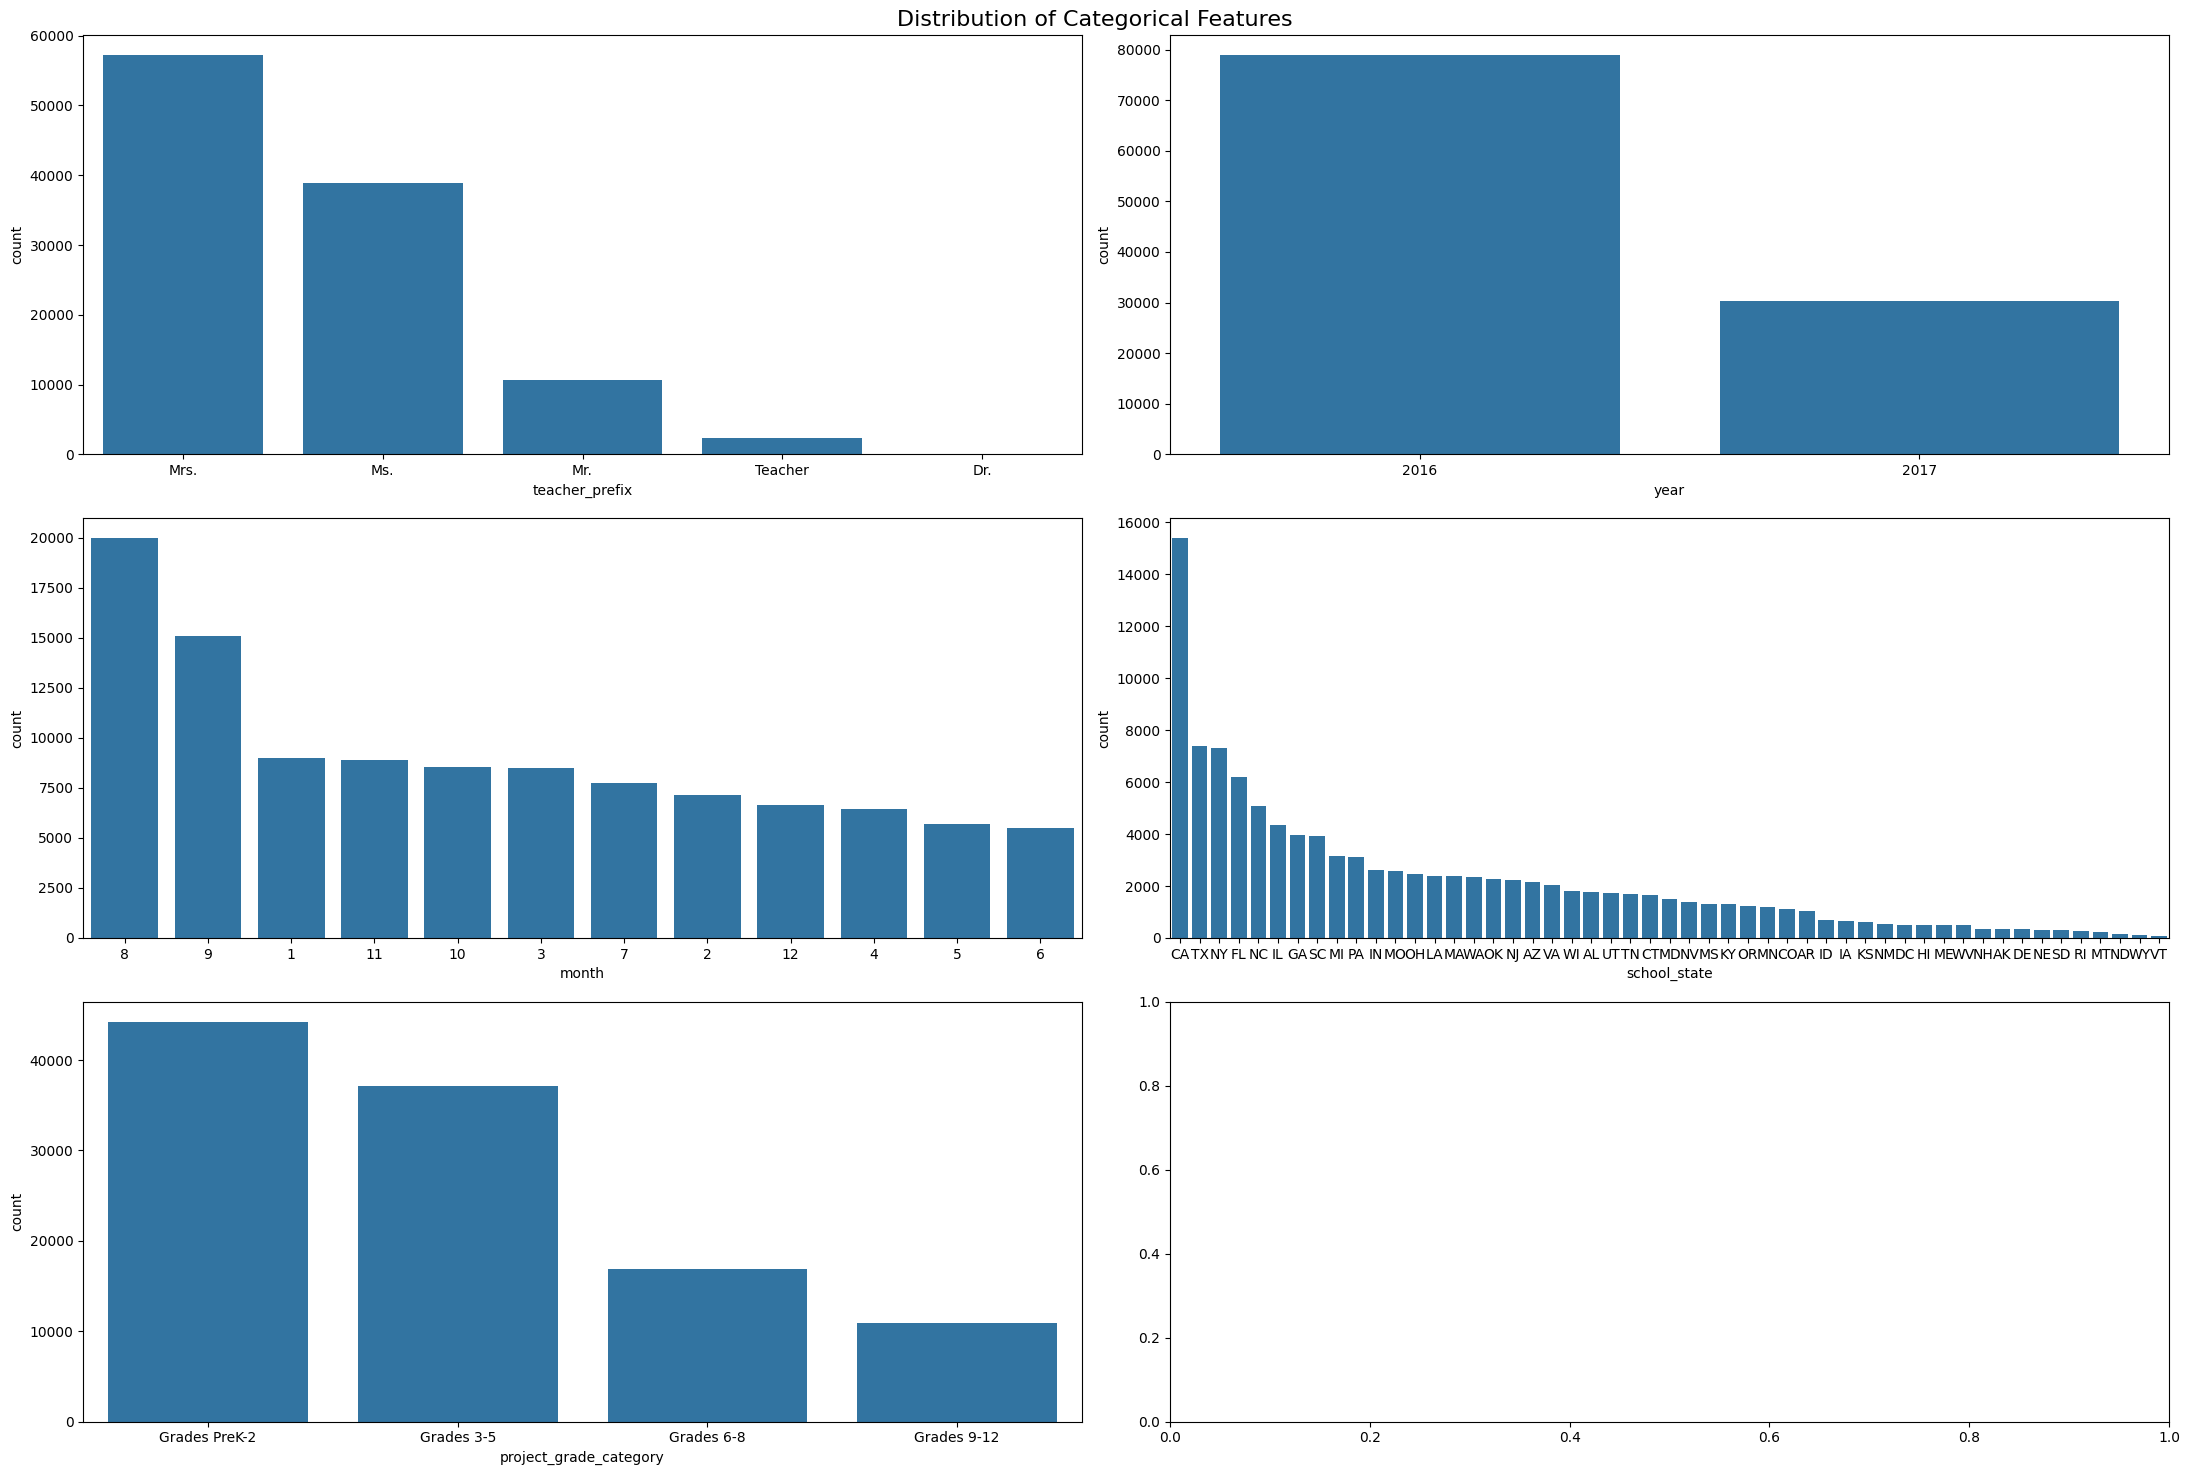

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(22, 15))
ax=ax.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(x=train_data[col], ax=ax[i], order=train_data[col].value_counts().index)
fig.suptitle('Distribution of Categorical Features', fontsize=16)
plt.tight_layout()

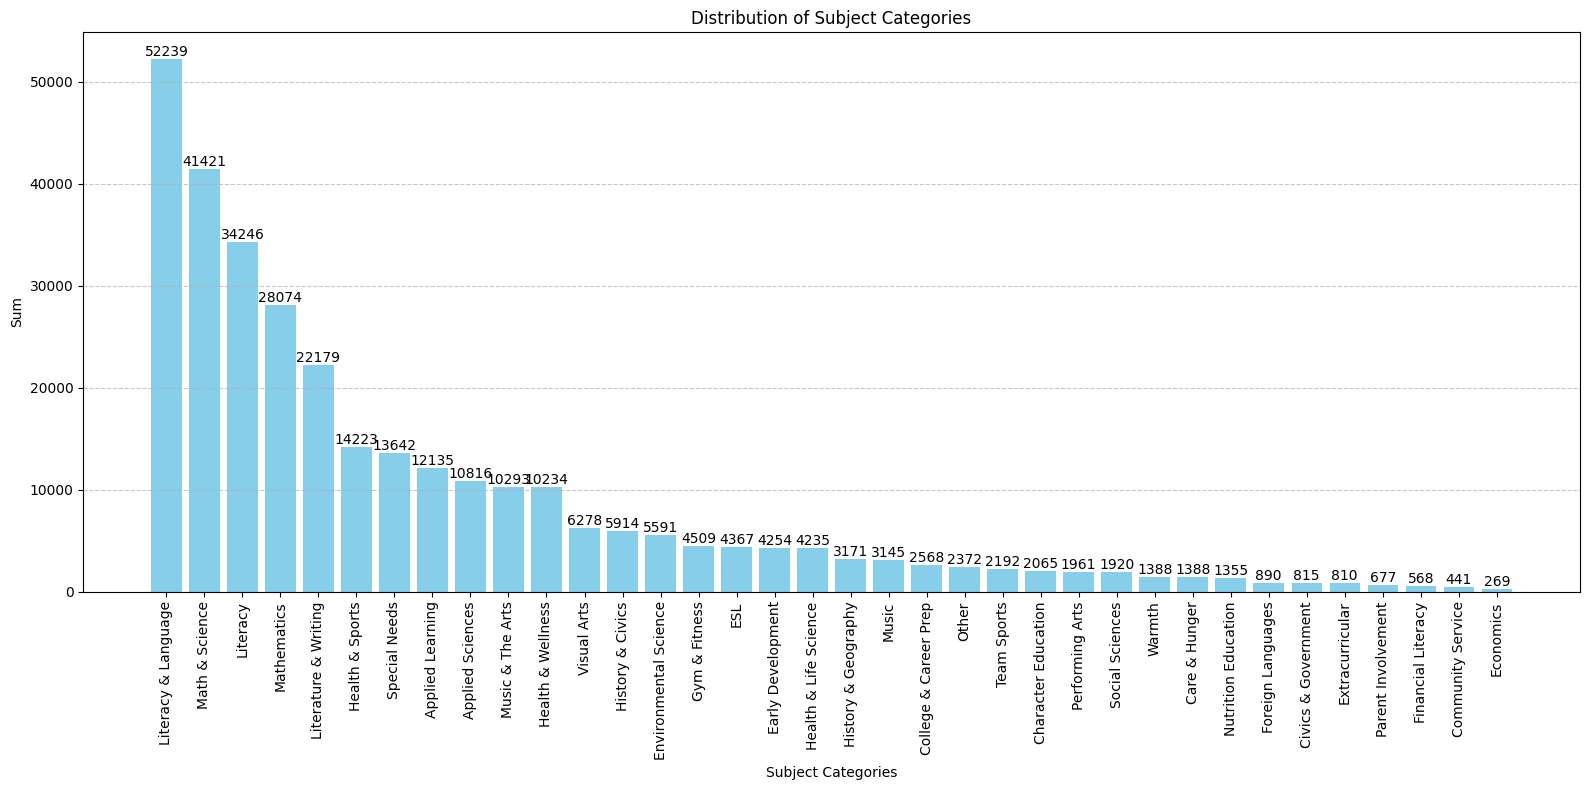

In [ ]:
list_of_categories = list(all_unique_subject_categories)

# Initialize an empty list to store the sums and categories
sums = []
categories = []

# Calculate the sum for each one-hot encoded column
for col in list_of_categories:
    column_sum = train_data[col].sum()
    sums.append(column_sum)
    categories.append(col)

# Create a DataFrame for plotting
sums_df = pd.DataFrame({
    'Category': categories,
    'Sum': sums
})

# Sort the DataFrame by sum in descending order
sums_df = sums_df.sort_values(by='Sum', ascending=False)

# Plotting
plt.figure(figsize=(16, 8))
bars = plt.bar(sums_df['Category'], sums_df['Sum'], color='skyblue')
plt.xlabel('Subject Categories')
plt.ylabel('Sum')
plt.title('Distribution of Subject Categories')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating bars with sums
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Reactions to categorical data distribution

We can see our categorical variables are not uniformly distributed with some like subject categories and school state being very highly imbalanced.

## Approval rate by category

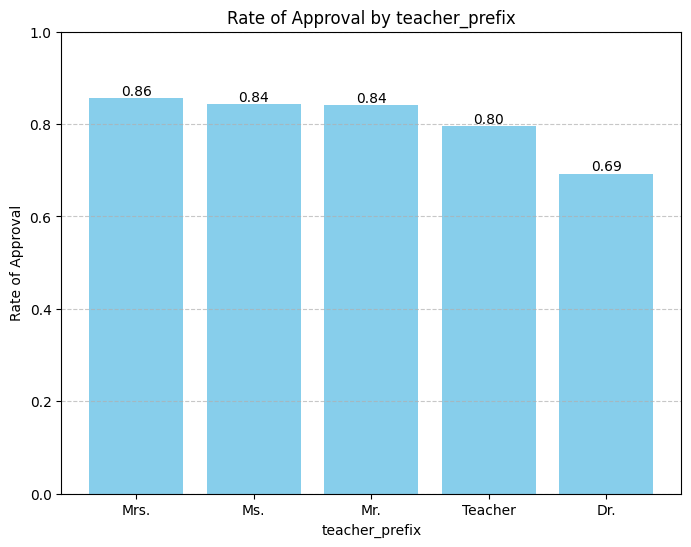

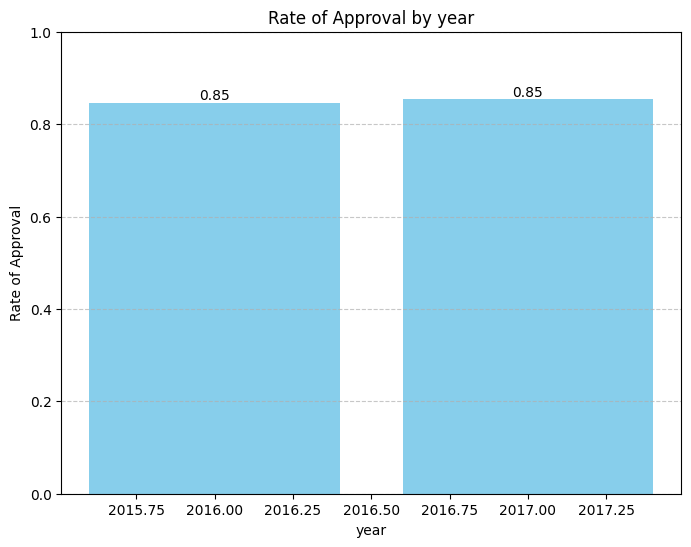

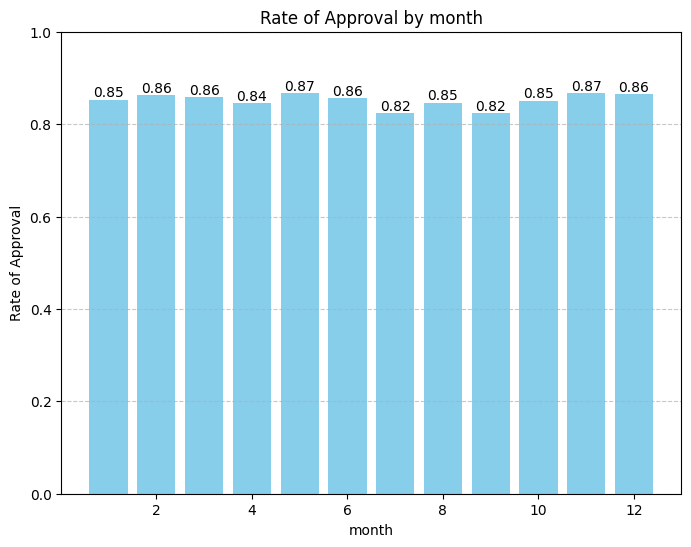

<Figure size 800x600 with 0 Axes>

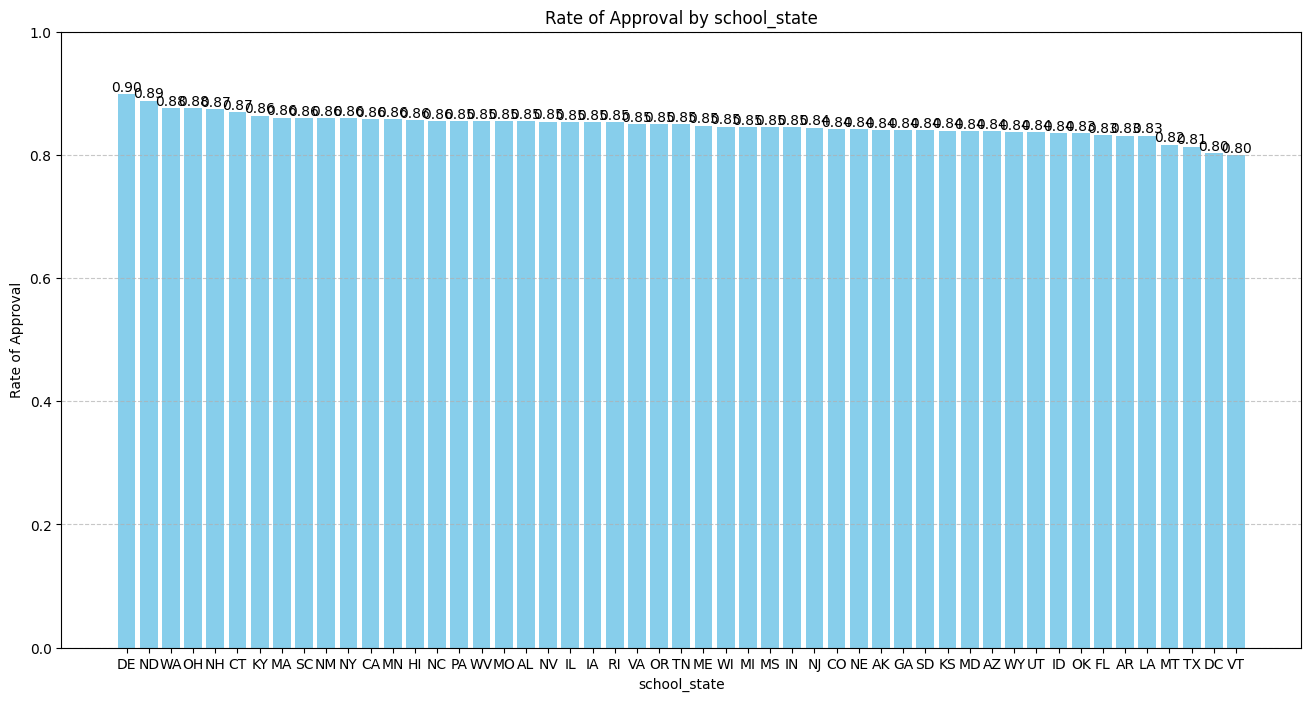

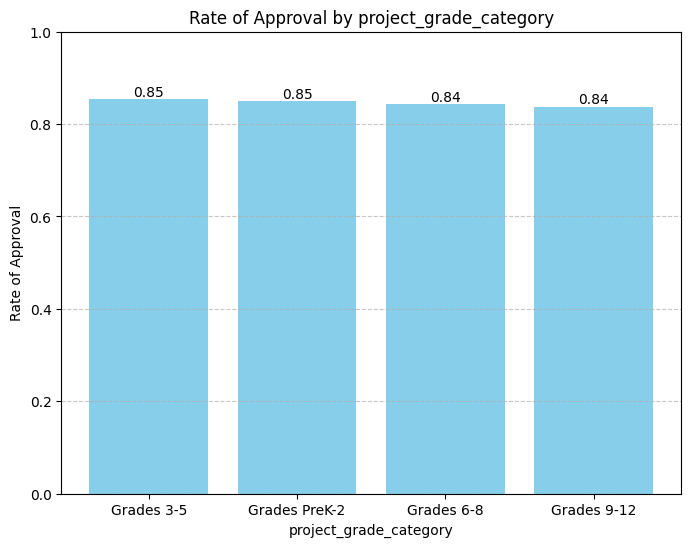

In [ ]:
for col in categorical_columns:
    # Group by the categorical column and calculate mean target
    group_df = train_data.groupby(col)['project_is_approved'].mean().reset_index()
    
    # Sort the values in descending order
    group_df = group_df.sort_values(by='project_is_approved', ascending=False)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    if col == 'school_state':
        plt.figure(figsize=(16, 8))
    bars = plt.bar(group_df[col], group_df['project_is_approved'], color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Rate of Approval')
    plt.title(f'Rate of Approval by {col}')
    plt.ylim(0, 1)  # Setting y-axis limit for rate
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotating bars with approval rates
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
    
    plt.show()

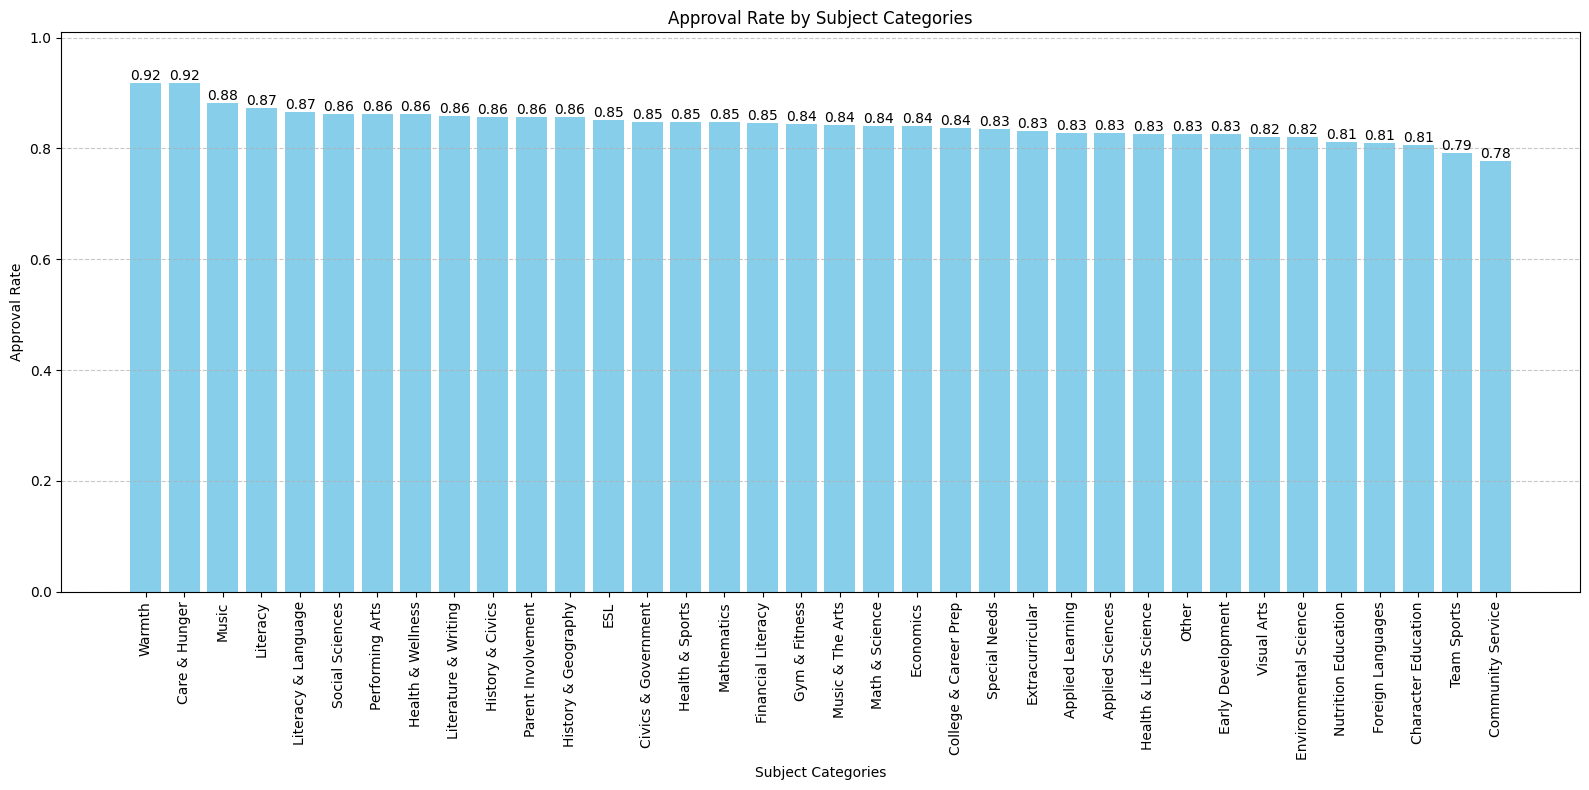

In [ ]:
# Initialize an empty list to store the approval rates
list_of_categories = list(all_unique_subject_categories)
approval_rates = []

# Calculate the approval rate for each one-hot encoded column
for col in list_of_categories:
    # Sum the values where project_is_approved is 1 and 0
    sum_approved = train_data[train_data['project_is_approved'] == 1][col].sum()
    sum_not_approved = train_data[train_data['project_is_approved'] == 0][col].sum()
    
    # Calculate the approval rate
    approval_rate = sum_approved / (sum_approved + sum_not_approved)
    approval_rates.append(approval_rate)

# Create a DataFrame for plotting
approval_rate_df = pd.DataFrame({
    'Category': list_of_categories,
    'Approval Rate': approval_rates
})

# Sort the DataFrame by approval rate in descending order
approval_rate_df = approval_rate_df.sort_values(by='Approval Rate', ascending=False)

# Plotting
plt.figure(figsize=(16, 8))
bars = plt.bar(approval_rate_df['Category'], approval_rate_df['Approval Rate'], color='skyblue')
plt.xlabel('Subject Categories')
plt.ylabel('Approval Rate')
plt.title('Approval Rate by Subject Categories')
plt.ylim(0, max(approval_rate_df['Approval Rate']) * 1.1)  # Setting y-axis limit for better visualization
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating bars with approval rates
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Reactions to approval rates amongst categorical variables
There is generally not much variance in approval rate across categories in the categorical data. There is the most variance within the subject categories, school_state column, and teacher_prefix column. We may not be able to expect a ton of use from these columns in the model given this fairly even distribution across categories with respect to the taregt variable. We will still try using them to see if they help the results because perhaps a model will be able to identify combinations of these features that do result in predicitive power.

Again, we will have to look at correlation, particularly amongst the project categories, to see if we'll need to address that before modeling.

## EDA Continuous Numerical Columns

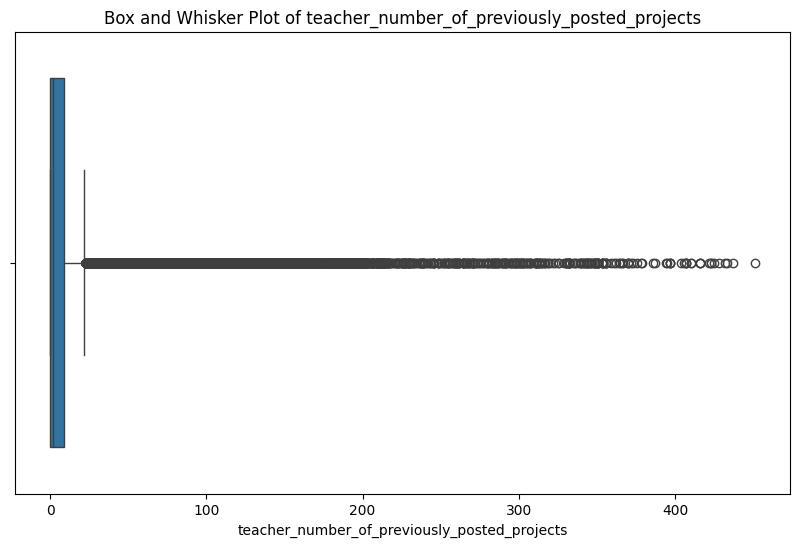

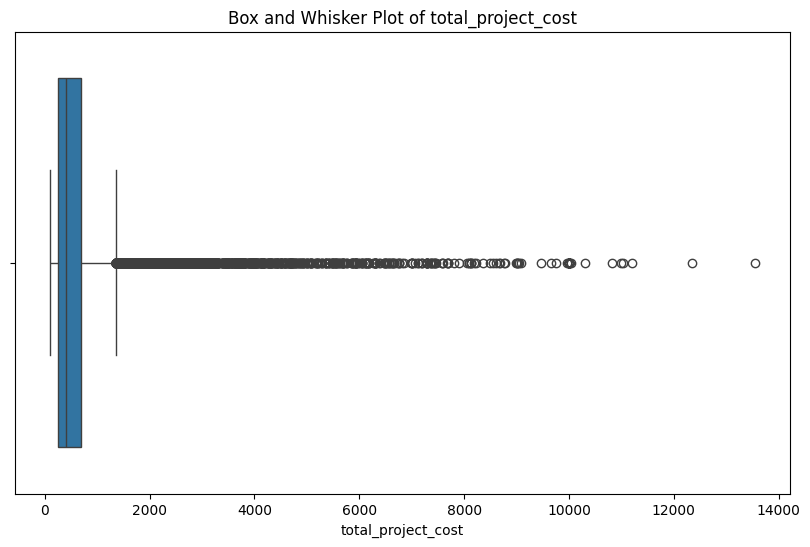

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_data[col])

    # Add title and labels
    plt.title(f'Box and Whisker Plot of {col}')
    plt.xlabel(col)

    # Show the plot
    plt.show()

In [ ]:
train_data[numerical_columns].describe().round(2)

teacher_number_of_previously_posted_projects  total_project_cost
count                                     109248.00           109248.00
mean                                          11.15              545.58
std                                           27.78              546.83
min                                            0.00              100.00
25%                                            0.00              245.92
50%                                            2.00              397.00
75%                                            9.00              691.55
max                                          451.00            13543.82

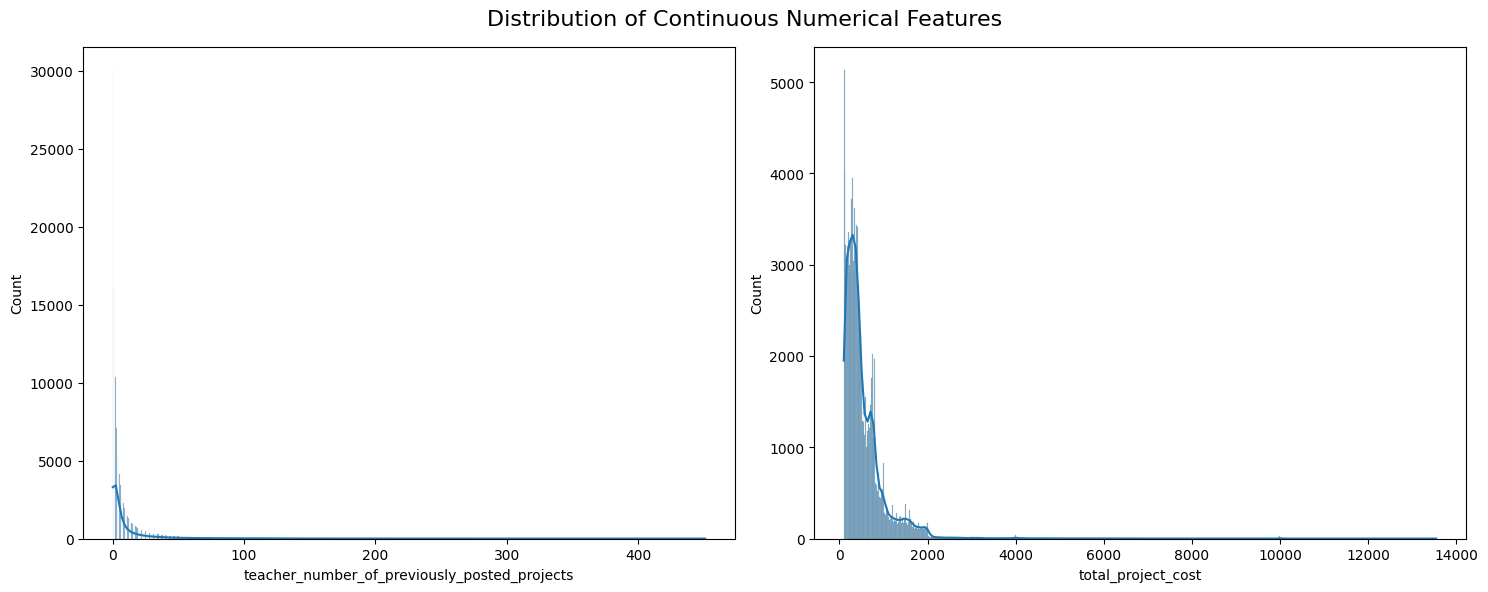

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax=ax.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(data=train_data[col],ax=ax[i], kde=True)
fig.suptitle('Distribution of Continuous Numerical Features', fontsize=16)
plt.tight_layout()

For both of our numerical columns we have right-skewed data with a tail of outliers to the right.

### Plotting Relationship Between Numerical Columns and Approval Rate
I would imagine that there might be a correlation between these columns and out target variable, positive with previously posted projecs and negative with total cost. We can plot these columns compared to approval rate and make use of bins to make it more readable given the intense right skew of the data.

/var/folders/br/1l7rm9zx1g97jp66903rk5cw0000gn/T/ipykernel_60206/1569710755.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_train_data = train_data.groupby('bin')['project_is_approved'].agg(['mean', 'count']).reset_index()


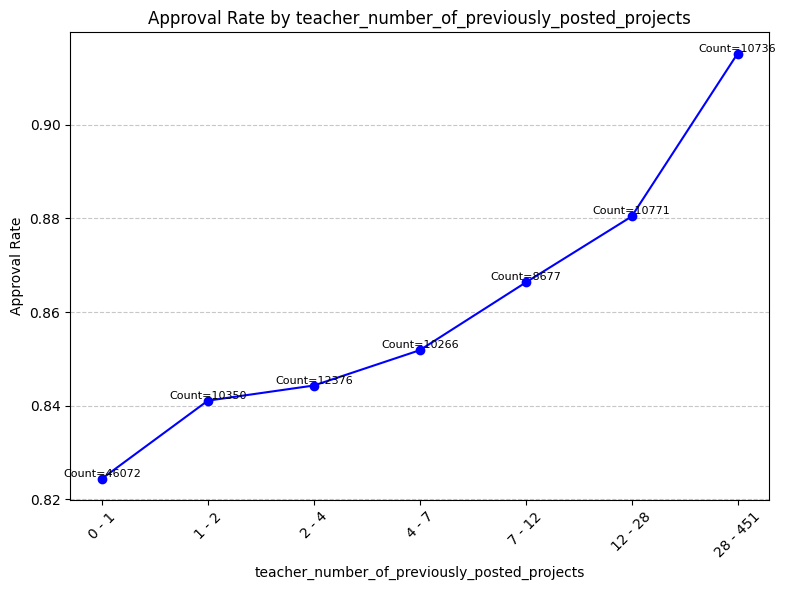

/var/folders/br/1l7rm9zx1g97jp66903rk5cw0000gn/T/ipykernel_60206/1569710755.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_train_data = train_data.groupby('bin')['project_is_approved'].agg(['mean', 'count']).reset_index()


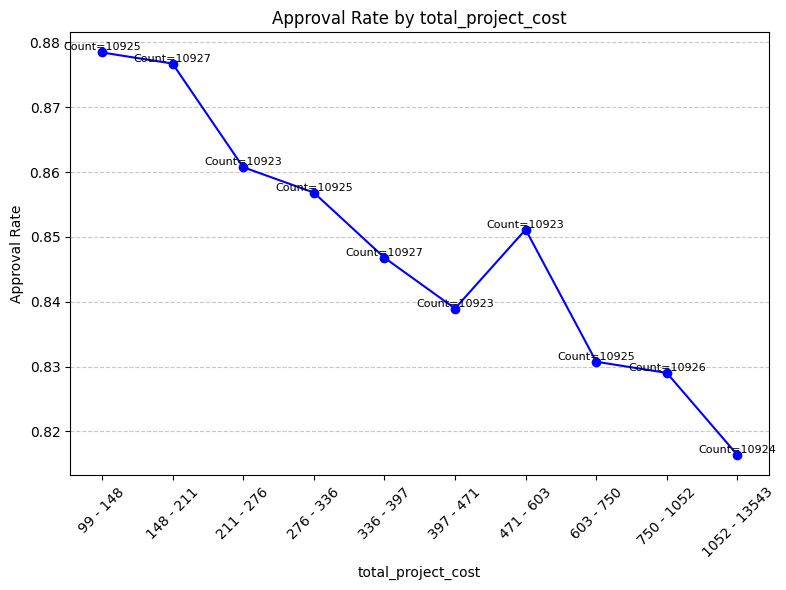

In [ ]:
# Plotting each numerical column
for col in numerical_columns:
    # Create quantile-based bins for numerical column
    train_data['bin'] = pd.qcut(train_data[col], q=10, duplicates='drop')
    
    # Group by bins and calculate mean target and count
    group_train_data = train_data.groupby('bin')['project_is_approved'].agg(['mean', 'count']).reset_index()
    
    # Convert Interval objects to string representation without decimals
    group_train_data['bin'] = group_train_data['bin'].apply(lambda x: f"{int(x.left)} - {int(x.right)}")
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(group_train_data['bin'], group_train_data['mean'], marker='o', linestyle='-', color='b', label='Approval Rate')
    plt.xlabel(col)
    plt.ylabel('Approval Rate')
    plt.title(f'Approval Rate by {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    
    # Annotate each point with the count of examples
    for i, txt in enumerate(group_train_data['count']):
        plt.text(group_train_data['bin'][i], group_train_data['mean'][i], f'Count={txt}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

#drop the bin column added to plot the above charts
train_data.drop('bin', inplace=True, axis=1)

While the variance in approval rate is again not high, generally ranging from 0.80 - 0.90 for both features, we can observe a clear positive correlation with previous projects and a negative one with project cost.

# Categorical Feature Encoding
I want to encode all of the categorical features. This will allow me to do correlation matrices to see correlation with the target variable as well as with each other (particularly for the subject categories) to see if we should handle that by dropping certain categories or possibly doing PCA.
### One-Hot Encoding
I'm going to do one-hot encoding on all of them since none of them lend themselves to a natural hierarchy. There is a possible exception with grade category, which could be considered hierarchical as they increase with age, however, I do not feel this is truly hierarchical and I think even this column should be one-hot encoded. If I had more time for this I might also try ordinal encoding grade category to see if it improves model performance but for our purposes now I won't bother.

In [ ]:
train_data=pd.get_dummies(data=train_data, columns=categorical_columns, drop_first=True)

pd.set_option('display.max_columns', None)
train_data.head()

Unnamed: 0       id                        teacher_id  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

   total_project_cost  Warmth  Financial Literacy  Visual Arts  \
0              596.36       0                   0            0   
1              299.00       0                   0            0   
2              686.68       0                   0            0   
3              431.90       0                   0            0   
4              143.96       0                   0            0   

   Health & Life Science  Nutrition Education  Mathematics  Foreign Languages  \
0                      0                    0            0                  0   
1                      0                    0            0                  0   
2                      0                    0            0                  0   
3                      0                    0            1                  0   
4                      0                    0            1                  0   

   Economics  Team Sports  Literacy & Language  History & Geography  \
0          0            0                    1                    0   
1          0            1                    0                    0   
2          0            1                    0                    0   
3          0            0                    1                    0   
4          0            0                    0                    0   

   Environmental Science  College & Career Prep  Music  Community Service  \
0                      0                      0      0                  0   
1                      0                      0      0                  0   
2                      0                      0      0                  0   
3                      0                      0   

## Correlation Between Features and Target Variable

In [ ]:
# Calculate the correlation matrix
corr_columns = train_data.drop(['Unnamed: 0', 'id', 'teacher_id', 'project_title', 'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4', 'project_resource_summary'], axis=1)

corr_columns.head()

correlation_matrix = corr_columns.corr()

# Extract the correlations with the target column
correlations_with_target = correlation_matrix['project_is_approved'].drop('project_is_approved')

# Sort the correlations from highest to lowest
sorted_correlations = correlations_with_target.abs().sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlations[:50])

teacher_number_of_previously_posted_projects    0.064854
Literacy & Language                             0.046206
Literacy                                        0.045271
total_project_cost                              0.035026
month_9                                         0.028529
school_state_TX                                 0.026643
Team Sports                                     0.022781
teacher_prefix_Teacher                          0.022071
Warmth                                          0.021926
Care & Hunger                                   0.021926
Applied Learning                                0.020768
teacher_prefix_Mrs.                             0.020427
Applied Sciences                                0.019774
month_7                                         0.018888
Visual Arts                                     0.018697
Environmental Science                           0.017896
Character Education                             0.016375
Math & Science                 

There is not a significant correlation between any single feature and our target variable. However, we find the most correlation with teacher_number_of_previously_posted_projects, Literacy, Literacy & Language (which is most likely highly correlated with Literacy), and total_project_cost.

## Inspecting Multicollinearity Amongst Subject Categories

In [ ]:
print("CATEGORIES")
print("")
for category in subject_categories:
    print(category)

print("")
print("SUBCATEGORIES")
print("")
for category in subject_subcategories:
    print(category)

CATEGORIES

Warmth
Care & Hunger
Special Needs
Music & The Arts
Applied Learning
Health & Sports
Math & Science
Literacy & Language
History & Civics

SUBCATEGORIES

Warmth
Financial Literacy
Visual Arts
Health & Life Science
Nutrition Education
Foreign Languages
Economics
Team Sports
History & Geography
Environmental Science
College & Career Prep
Music
Community Service
Literature & Writing
Care & Hunger
Special Needs
Civics & Government
ESL
Parent Involvement
Applied Sciences
Extracurricular
Gym & Fitness
Performing Arts
Early Development
Literacy
Health & Wellness
Social Sciences
Character Education
Other
Mathematics


We see that there is a short list of individual categories and a longer list of individual sub-categories. Let's plot a correlation matrix of them to see the possible multicollinearity between them.

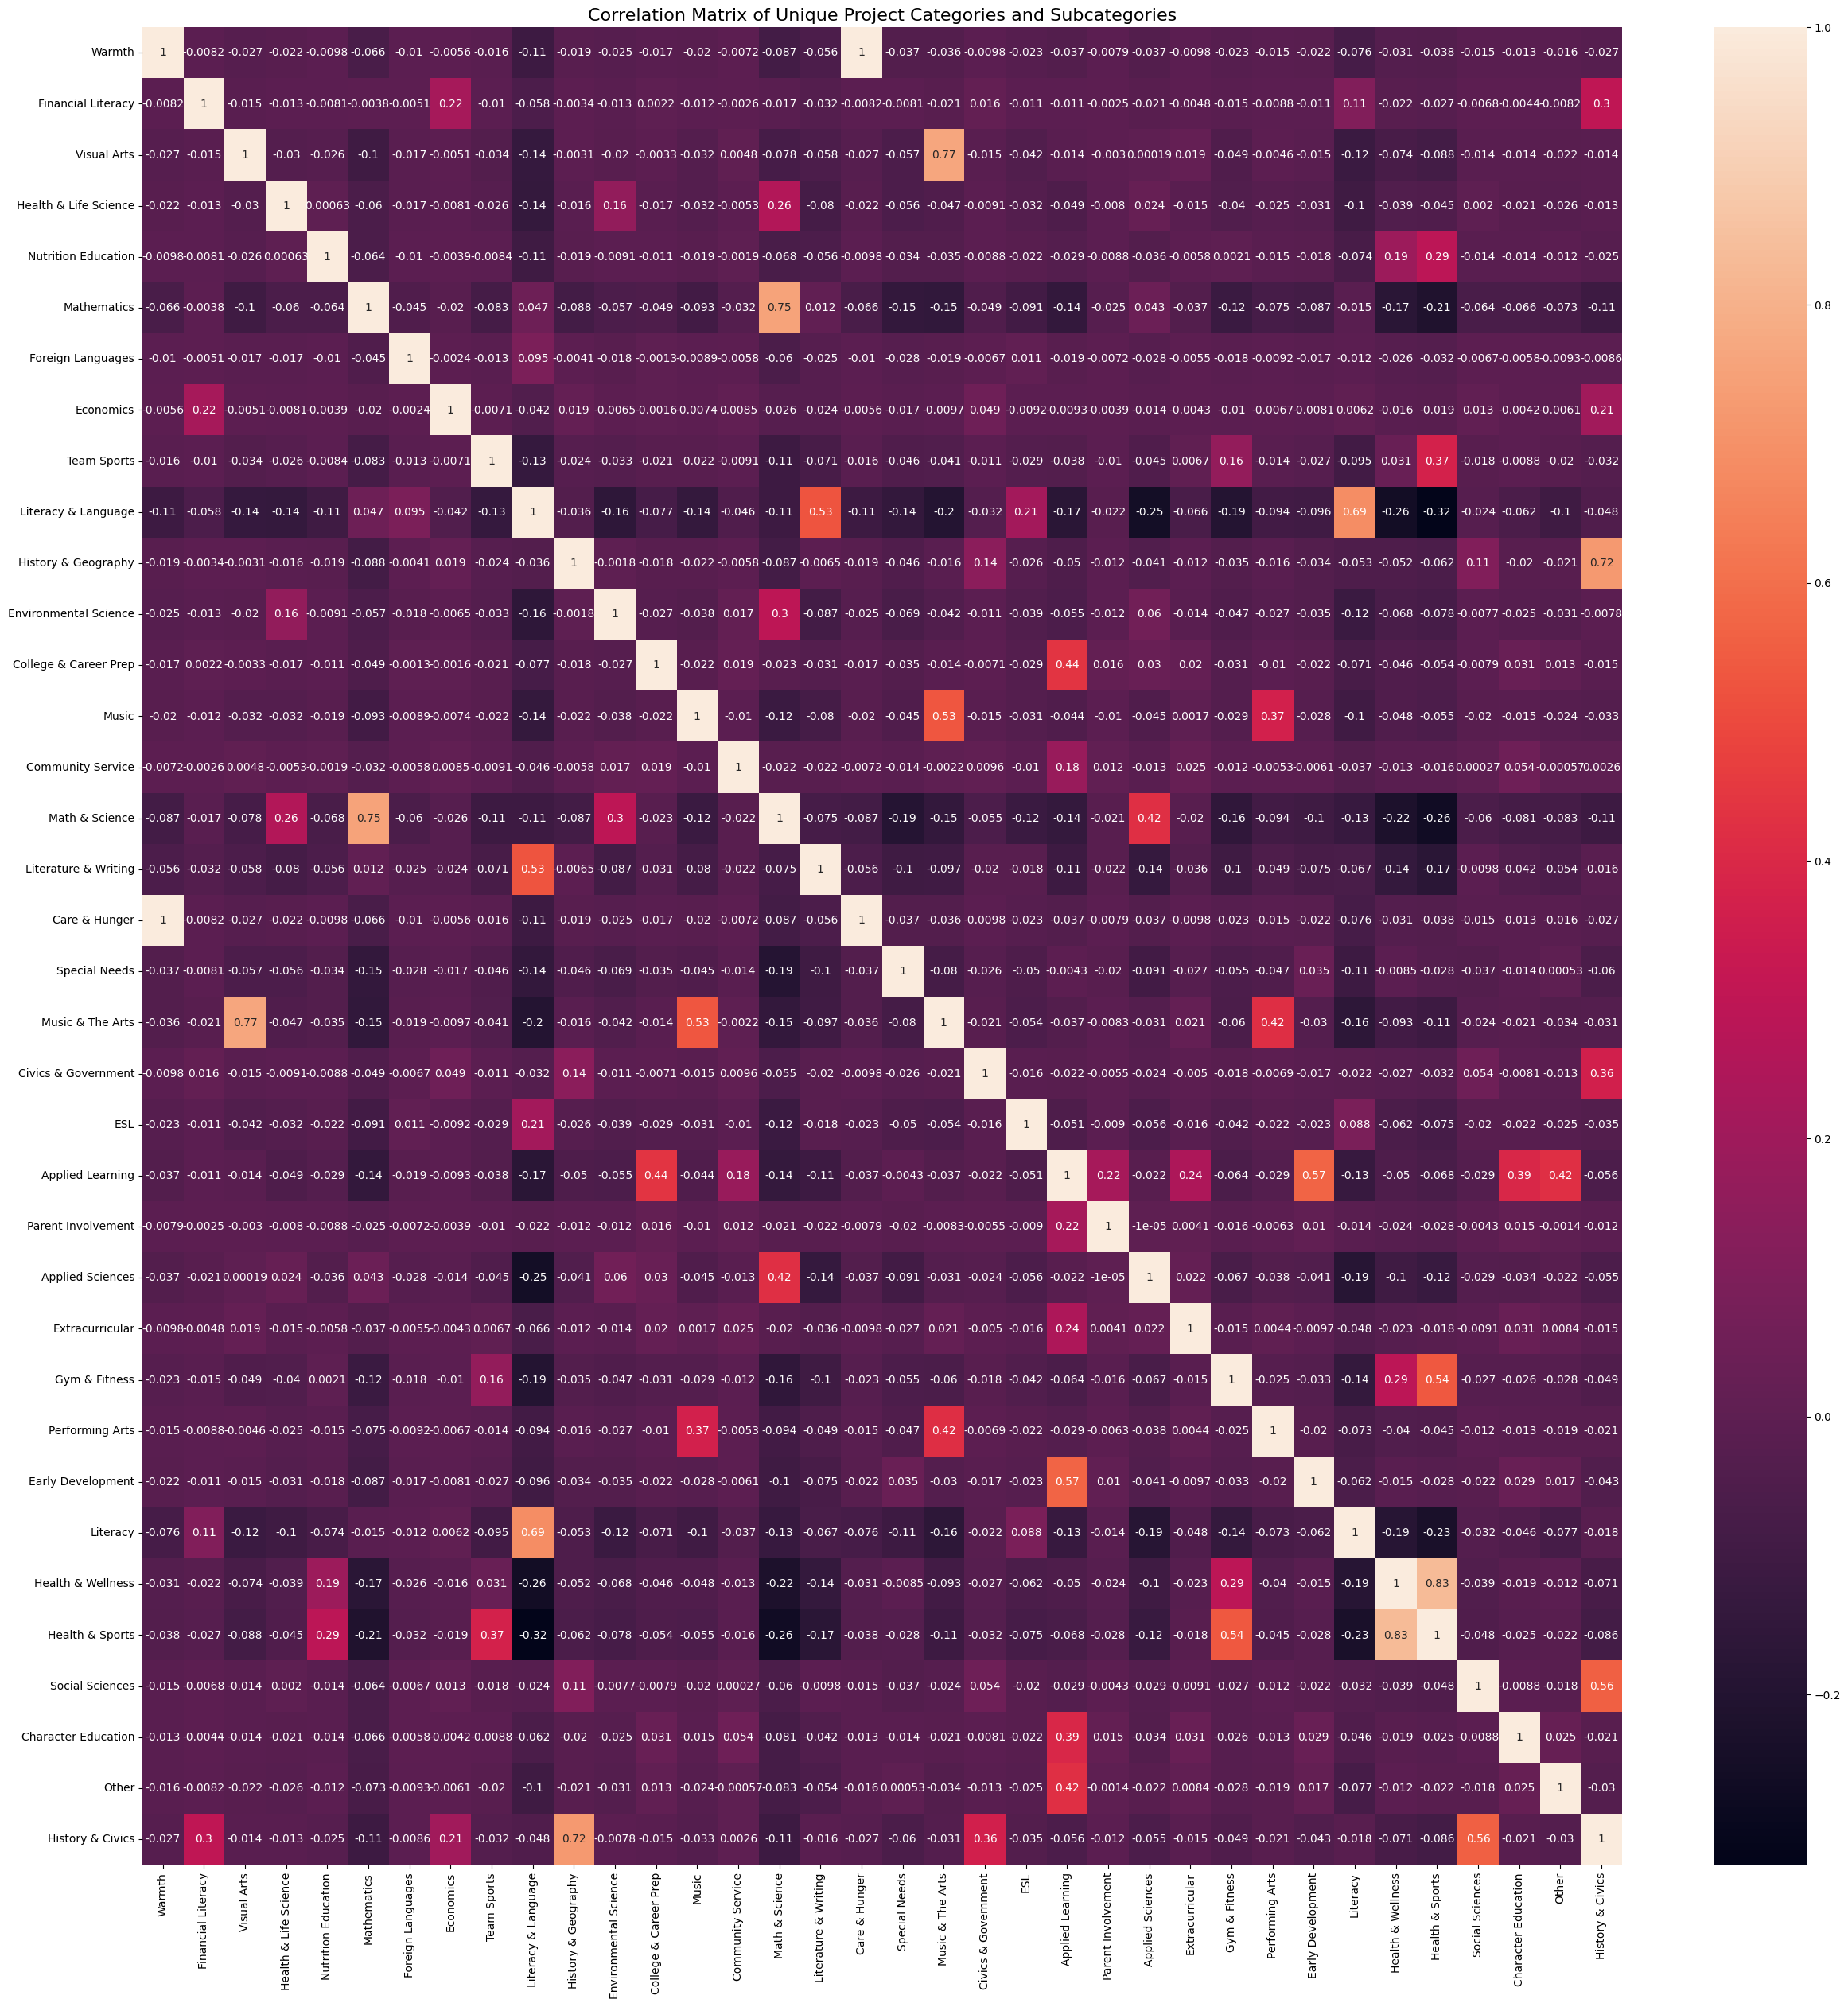

In [ ]:
# Plot a correlation matrix of all_unique_subject_categories within train_data. Order 
heatmap_columns = train_data.columns[train_data.columns.isin(all_unique_subject_categories)]

plt.figure(figsize=(30, 30))
plt.title("Correlation Matrix of Unique Project Categories and Subcategories", fontsize=16)
sns.heatmap(train_data[heatmap_columns].corr(), annot=True)
plt.show()

## Dealing with multicollinearity of project categories

As we can see there is clearly a high level of multicollinearity between many of these subject categories. In many cases this is probably due to the fact that many project categories and subcategories appear together. For instance, 'Mathematics' and 'Math & Science' have a 0.75 correlation coeficcient.

### Opting to drop categories instead of using PCA
One way to handle this would be to use PCA. However, we lose interpretability by doing that which is important to us in this case. So instead we can simply drop highly correlated categories so as to reduce multicollinearity while preserving interpretability.

For categories with correlation of 0.4 or higher we will choose to drop one of them. We will prioritize dropping the subcategory when possible so as to rely on the main categories as much as possible.

In [ ]:
highly_correlated_categories = []
used_categories = []
for category_1 in all_unique_subject_categories:
    for category_2 in all_unique_subject_categories:
        if category_1!= category_2 and category_1 not in used_categories:
            correlation = train_data[category_1].corr(train_data[category_2])
            if abs(correlation) > 0.4:
                highly_correlated_categories.append((category_1, category_2, round(correlation, 2)))
                used_categories.extend([category_1, category_2])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


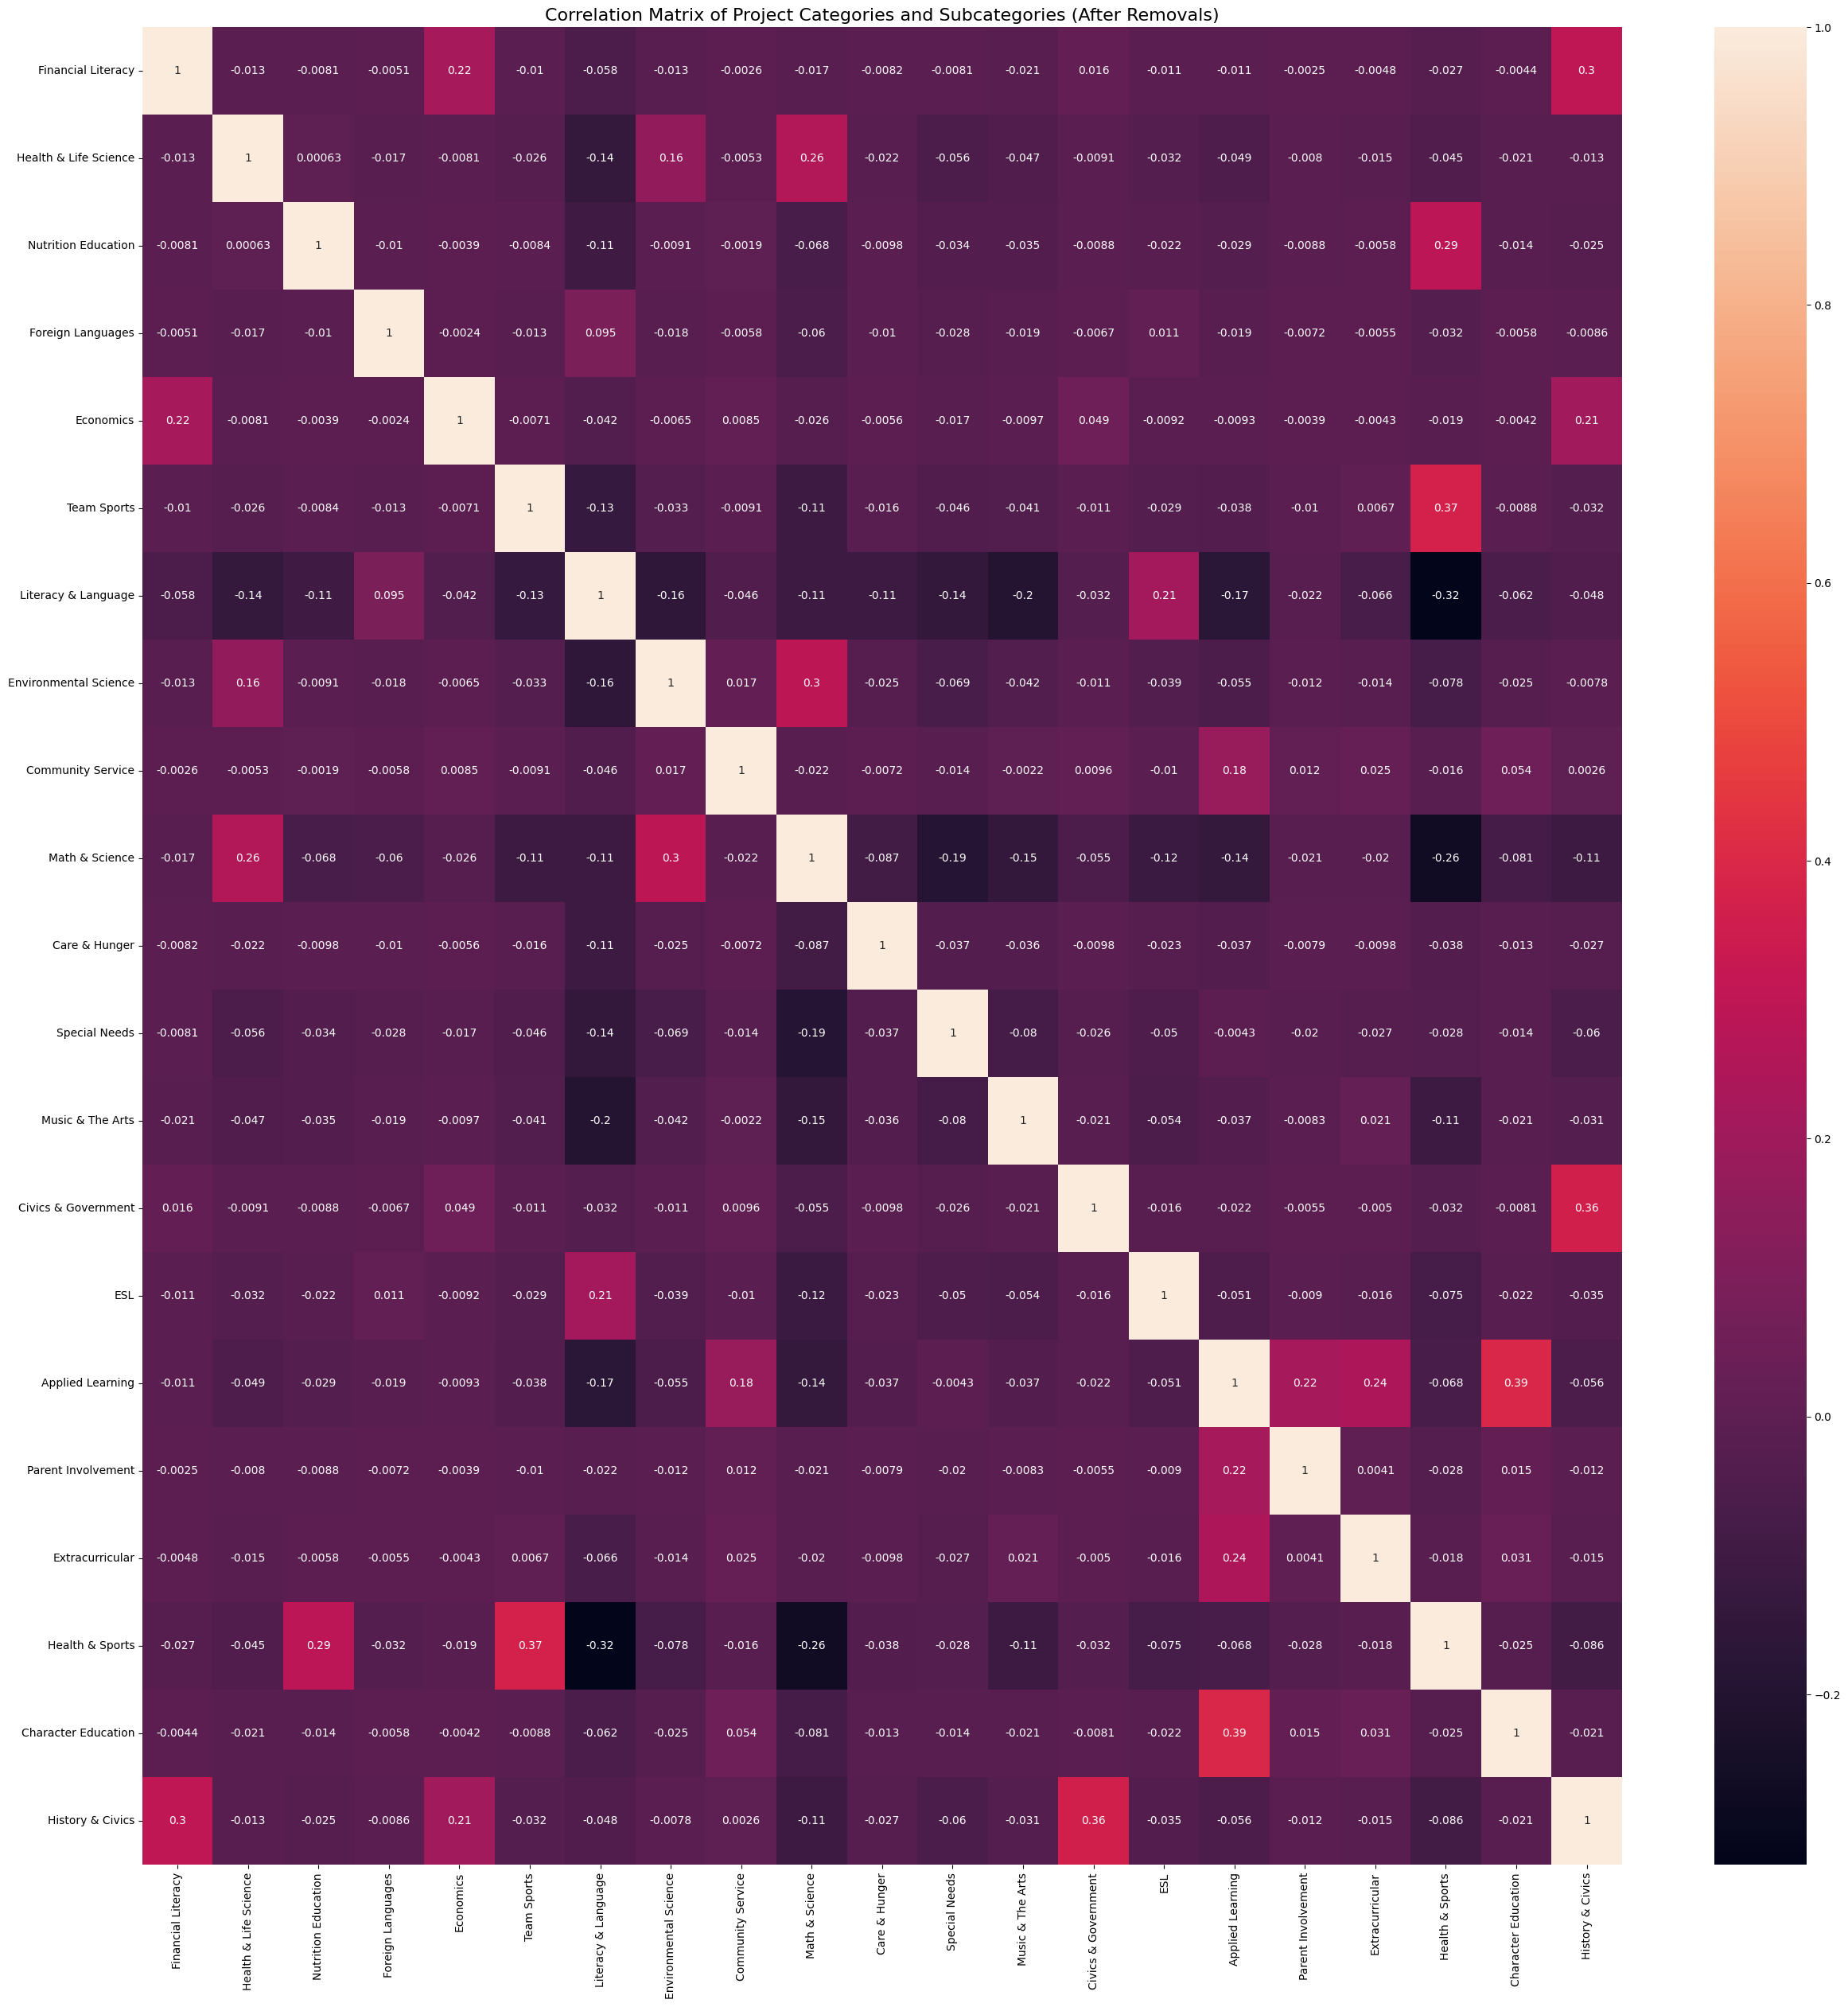

In [ ]:
# for each pair of categories within highly_correlated_categories identify one to remove. Remove categories that appear in subject_subcategories when possible.
less_corrleated_subject_categories = all_unique_subject_categories.copy()
categories_to_remove = []

for category_1, category_2, correlation in highly_correlated_categories:
    if category_1 in subject_subcategories:
        # train_data = train_data.drop(columns=[category_1])
        less_corrleated_subject_categories.remove(category_1)
        categories_to_remove.append(category_1)
    else:
        # train_data = train_data.drop(columns=[category_2])
        less_corrleated_subject_categories.remove(category_2)
        categories_to_remove.append(category_2)

plt.figure(figsize=(30, 30))
plt.title("Correlation Matrix of Project Categories and Subcategories (After Removals)", fontsize=16)
sns.heatmap(train_data[list(less_corrleated_subject_categories)].corr(), annot=True)
plt.show()

After removing categories our correlation matrix looks much better. We still have a few categories with low to moderate correlation but it's acceptable.

In [ ]:
print("CATEGORIES")
print("")
for category in subject_categories:
    if category in less_corrleated_subject_categories:
        print(category)

print("")
print("SUBCATEGORIES")
print("")
for category in subject_subcategories:
    if category in less_corrleated_subject_categories:
        print(category)

CATEGORIES

Care & Hunger
Special Needs
Music & The Arts
Applied Learning
Health & Sports
Math & Science
Literacy & Language
History & Civics

SUBCATEGORIES

Financial Literacy
Health & Life Science
Nutrition Education
Foreign Languages
Economics
Team Sports
Environmental Science
Community Service
Care & Hunger
Special Needs
Civics & Government
ESL
Parent Involvement
Extracurricular
Character Education


We can see here that we still have all but one of our original categories (Warmth). Most of the removed ones were sub-categories.

In the future I might try and remove some of the remaining moderately correlated categories such as Applied Learning to see if it improves model performance, however, I imagine we're talking about marginal gains so for our purposes here we will stick with these categories.

### Dropping Correlated Subject Categories

In [ ]:
train_data.drop(categories_to_remove, axis=1, inplace=True)
train_data.head()

Unnamed: 0       id                        teacher_id  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

   total_project_cost  Financial Literacy  Health & Life Science  \
0              596.36                   0                      0   
1              299.00                   0                      0   
2              686.68                   0                      0   
3              431.90                   0                      0   
4              143.96                   0                      0   

   Nutrition Education  Foreign Languages  Economics  Team Sports  \
0                    0                  0          0            0   
1                    0                  0          0            1   
2                    0                  0          0            1   
3                    0                  0          0            0   
4                    0                  0          0            0   

   Literacy & Language  Environmental Science  Community Service  \
0                    1                      0                  0   
1                    0                      0                  0   
2                    0                      0                  0   
3                    1                      0                  0   
4                    0                      0                  0   

   Math & Science  Care & Hunger  Special Needs  Music & The Arts  \
0               0              0              0                 0   
1               0              0              0                 0   
2               0              0              0                 0   
3               1              0              0                 0   
4               1              0              0                 0   

   Civics & Governmen

## Dropping unused columns
I will drop all columns we don't need for modeling. I am also dropping our free text columns for now so we can attempt modeling without them first. I will save them and bring them back later but it will be interesting to see what model performance can be achieved without NLP first.

In [ ]:
text_columns_df = train_data[text_columns]

train_data.drop(['Unnamed: 0', 'id', 'teacher_id'], axis=1, inplace=True)
train_data.drop(['project_title', 'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4', 'project_resource_summary',], axis=1, inplace=True)

train_data.head()

teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

   total_project_cost  Financial Literacy  Health & Life Science  \
0              596.36                   0                      0   
1              299.00                   0                      0   
2              686.68                   0                      0   
3              431.90                   0                      0   
4              143.96                   0                      0   

   Nutrition Education  Foreign Languages  Economics  Team Sports  \
0                    0                  0          0            0   
1                    0                  0          0            1   
2                    0                  0          0            1   
3                    0                  0          0            0   
4                    0                  0          0            0   

   Literacy & Language  Environmental Science  Community Service  \
0                    1                      0                  0   
1                    0                      0                  0   
2                    0                      0                  0   
3                    1                      0                  0   
4                    0                      0                  0   

   Math & Science  Care & Hunger  Special Needs  Music & The Arts  \
0               0              0              0                 0   
1               0              0              0                 0   
2               0              0              0                 0   
3               1              0              0                 0   
4               1              0              0                 0   

   Civics & Government  ESL  Applied Learning  Parent Involvement  \
0                    0    1                 0                   0   
1                    1    0                 0                   0   
2                    0    0                 0                   0   
3                    0    0                 0                   0   
4                    0    0                 0                   0   

   Extracurricular  Health & Sports  Character Education  History & Civics  \
0                0                0                    0                 0   
1                0                1                    0                 1   
2                0                1                    0                 0   
3                0                0                    0                 0   
4                0                0                    0                 0   

   teacher_prefix_Mr.  teacher_prefix_Mrs.  teacher_prefix_Ms.  \
0               False                 True               False   
1                True                False               False   
2               False                False                True   
3               False                 True               False   
4               False                 True               False   

   teacher_prefix_Teacher  year_2017  month_2  month_3  month_4  month_5  \
0                   False      False    False    False    False    False   
1                   False      False    False    False    False    False   
2                   False      False    False    False    False    False   
3                   False      False    False    False    False    False   
4                   False      False    False    False    False    False   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0    False    False    False    False     False     False      True   
1    False    False    False    False     

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Modeling
I will try three different model types throughout the modeling process:
- Logistic Regression
- XGBoost
- Random Forest

I believe this is a good assortment of models covering a range of different algorithm types for our classification objective. Through our subsequent process of experimentation we will determine which model performs best and under which circumstances

## Initial Model Runs to Establish Baseline
There are a number of things we have in mind to still do to possibly improve model performance, however, it will be instructive to model at this point and then try these ideas afterwards to be able to see if and how they improve model performance. These ideas include:
- Employing strategies to balance our target variable
- Transforming our two continuous numerical columns to account for the right skewed data to improve certain types of models (not tree-based models)
- Scaling our two continuous numerical columns to improve certain types of models (not tree-based models)
- Trying PCA on our categorical columns to reduce number of features and multicollinearity
- Hyper parameter tuning
- NLP on our free text features
- Ordinal encoding the project_grade_category column to see if it performs better than one-hot encoding

### Model Evaluation Function

In [ ]:
def accuracy_report(model, X_train_to_use, X_test_to_use, y_train_to_use, y_test_to_use, values_list):
    '''This function will assess model performance. Given a sklearn model it will Predict, and measure performance for both Test and Train Data'''
    #Train
    print('Train Data:\n-----------')
    print_evaluations(model, X_train_to_use, y_train_to_use, values_list)
    
    print('Test Data:\n----------')
    print_evaluations(model, X_test_to_use, y_test_to_use, values_list)

def print_evaluations(model, X_data, y_data, values_list):
    pred_data = model.predict(X_data)

    # Print metrics
    print("Accuracy: ", round(accuracy_score(y_data, pred_data), 4))
    print("ROC AUC Score: ", round(roc_auc_score(y_data, pred_data), 4))

    # Evaluate
    print("Classification Report:")
    print(classification_report(y_data, pred_data, target_names = values_list))
    print("Confusion Matrix:")
    print(confusion_matrix(y_data, pred_data))
    roc_plot(model, X_data, y_data, values_list)

def roc_plot(model, X_data, y_data, values_list):
    y_scores = model.predict_proba(X_data)[:, 1]
    # y_data = y_data.map({values_list[0]:0,values_list[1]:1})
    fpr, tpr, thresholds = roc_curve(y_data, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(3, 2))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

### Splitting target variable, training, and test data

In [ ]:
X=train_data.drop('project_is_approved',axis=1)
y=train_data['project_is_approved']

In [ ]:
# Splitting our dataset between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=100)

## Logisitic Regression

/Users/Ben/anaconda3/envs/conda_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Data:
-----------
Accuracy:  0.8497
ROC AUC Score:  0.5
Classification Report:
              precision    recall  f1-score   support

          no       0.00      0.00      0.00     13138
         yes       0.85      1.00      0.92     74260

    accuracy                           0.85     87398
   macro avg       0.42      0.50      0.46     87398
weighted avg       0.72      0.85      0.78     87398

Confusion Matrix:
[[    0 13138]
 [    1 74259]]


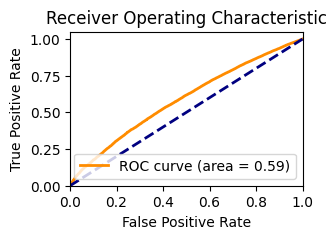

Test Data:
----------
Accuracy:  0.8442
ROC AUC Score:  0.5
Classification Report:
              precision    recall  f1-score   support

          no       0.00      0.00      0.00      3404
         yes       0.84      1.00      0.92     18446

    accuracy                           0.84     21850
   macro avg       0.42      0.50      0.46     21850
weighted avg       0.71      0.84      0.77     21850

Confusion Matrix:
[[    0  3404]
 [    0 18446]]


/Users/Ben/anaconda3/envs/conda_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Ben/anaconda3/envs/conda_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Ben/anaconda3/envs/conda_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

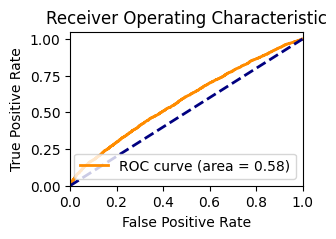

In [ ]:
log_reg_model = LogisticRegression(random_state=100)
log_reg_model.fit(X_train, y_train)

accuracy_report(log_reg_model, X_train, X_test, y_train, y_test, ['no','yes'])

## XGBClassifier

Train Data:
-----------
Accuracy:  0.8511
ROC AUC Score:  0.5052
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.01      0.02     13138
         yes       0.85      1.00      0.92     74260

    accuracy                           0.85     87398
   macro avg       0.89      0.51      0.47     87398
weighted avg       0.86      0.85      0.78     87398

Confusion Matrix:
[[  138 13000]
 [   10 74250]]


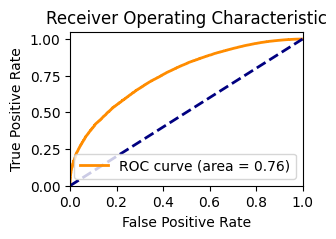

Test Data:
----------
Accuracy:  0.8436
ROC AUC Score:  0.5005
Classification Report:
              precision    recall  f1-score   support

          no       0.26      0.00      0.00      3404
         yes       0.84      1.00      0.92     18446

    accuracy                           0.84     21850
   macro avg       0.55      0.50      0.46     21850
weighted avg       0.75      0.84      0.77     21850

Confusion Matrix:
[[    7  3397]
 [   20 18426]]


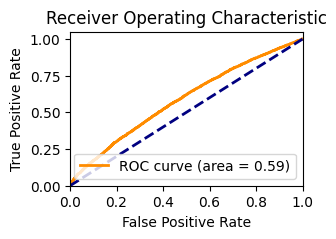

In [ ]:
xgb_model = XGBClassifier(random_state=100)
xgb_model.fit(X_train, y_train)

accuracy_report(xgb_model, X_train, X_test, y_train, y_test, ['no','yes'])

## RandomForestClassifier

Train Data:
-----------
Accuracy:  0.9999
ROC AUC Score:  0.9996
Classification Report:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     13138
         yes       1.00      1.00      1.00     74260

    accuracy                           1.00     87398
   macro avg       1.00      1.00      1.00     87398
weighted avg       1.00      1.00      1.00     87398

Confusion Matrix:
[[13129     9]
 [    2 74258]]


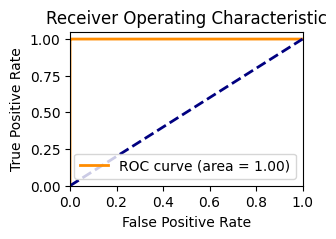

Test Data:
----------
Accuracy:  0.8346
ROC AUC Score:  0.5018
Classification Report:
              precision    recall  f1-score   support

          no       0.19      0.02      0.03      3404
         yes       0.84      0.99      0.91     18446

    accuracy                           0.83     21850
   macro avg       0.52      0.50      0.47     21850
weighted avg       0.74      0.83      0.77     21850

Confusion Matrix:
[[   63  3341]
 [  274 18172]]


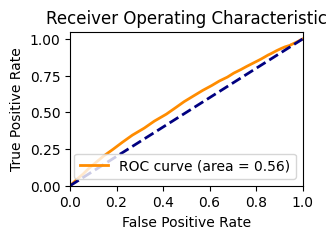

In [ ]:
rf_model = RandomForestClassifier(random_state=100)
rf_model.fit(X_train, y_train)

accuracy_report(rf_model, X_train, X_test, y_train, y_test, ['no','yes'])

## Reactions from Initial Model Runs
We immediately observe a few things:
- There is clearly a need to balance our target variable. In every single model there is a large imbalance between all of our evalauation metrics between our positive and negative class. Recall on our negative class is generally suffering the most meaning our models are biased to the positive class which makes sense since that this class that is far more present in our training data.

- We generally have an underfitting problem as most models are performing quite poorly on both training and test data. However, with our Random Forest model we actually have an overfitting problem as our model is acheiving perfect performance on our training data and poor performance on our test data.

## Metrics to focus on
Given the imbalance in our target variable, AUC ROC score will be key for us to focus on.

In addition, F1, currently abysmal, will be important to focus on. We do not have a strong reason to favor either precision or recall, thus F1 will be our guide to maximizing both.

We can already see that accuracy isn't a great metric for us on it's own. It is already quite high in many cases despite that F1 is close to or at 0 and AUC ROC is close to or at 0.5.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Model Run 2
#### Improvements to try:
- Target variable balancing
- Employ limiting parameters to reduce overfitting by Random Forest model

### Balancing Target Variable
Given that our target variable is imbalanced with the majority being the positive class as shown before, it will be important to employ a strategy to balance it so models are not biased. There are various balancing methods I could go with: oversampling, undersampling, smote, as well as built in class_weight balanced parameters for certain models. I  think it will be simplest to use the built in parameters for class balancing for the three models I will be working with.

In the future, I could experiment with the other methods to see if they result in improved performance.

## Logisitic Regression

Train Data:
-----------
Accuracy:  0.55
ROC AUC Score:  0.5662
Classification Report:
              precision    recall  f1-score   support

          no       0.19      0.59      0.28     13138
         yes       0.88      0.54      0.67     74260

    accuracy                           0.55     87398
   macro avg       0.53      0.57      0.48     87398
weighted avg       0.78      0.55      0.61     87398

Confusion Matrix:
[[ 7742  5396]
 [33934 40326]]


/Users/Ben/anaconda3/envs/conda_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


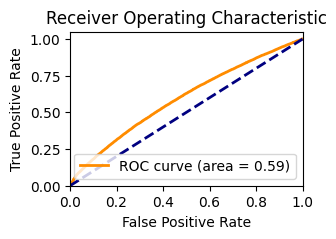

Test Data:
----------
Accuracy:  0.5406
ROC AUC Score:  0.5559
Classification Report:
              precision    recall  f1-score   support

          no       0.19      0.58      0.28      3404
         yes       0.87      0.53      0.66     18446

    accuracy                           0.54     21850
   macro avg       0.53      0.56      0.47     21850
weighted avg       0.77      0.54      0.60     21850

Confusion Matrix:
[[1968 1436]
 [8602 9844]]


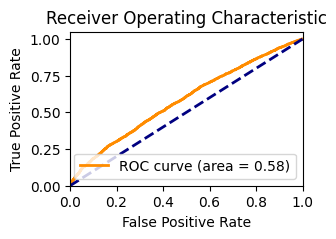

In [ ]:
log_reg_model = LogisticRegression(class_weight='balanced', random_state=100)
log_reg_model.fit(X_train, y_train)

accuracy_report(log_reg_model, X_train, X_test, y_train, y_test, ['no','yes'])

## XGBClassifier

/Users/Ben/anaconda3/envs/conda_env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [06:26:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "classrandom_state" } are not used.

  warnings.warn(smsg, UserWarning)


Train Data:
-----------
Accuracy:  0.6577
ROC AUC Score:  0.6782
Classification Report:
              precision    recall  f1-score   support

          no       0.26      0.71      0.38     13138
         yes       0.93      0.65      0.76     74260

    accuracy                           0.66     87398
   macro avg       0.59      0.68      0.57     87398
weighted avg       0.83      0.66      0.71     87398

Confusion Matrix:
[[ 9297  3841]
 [26079 48181]]


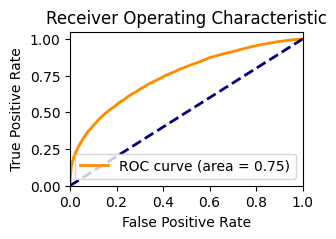

Test Data:
----------
Accuracy:  0.5971
ROC AUC Score:  0.5588
Classification Report:
              precision    recall  f1-score   support

          no       0.19      0.50      0.28      3404
         yes       0.87      0.61      0.72     18446

    accuracy                           0.60     21850
   macro avg       0.53      0.56      0.50     21850
weighted avg       0.76      0.60      0.65     21850

Confusion Matrix:
[[ 1713  1691]
 [ 7113 11333]]


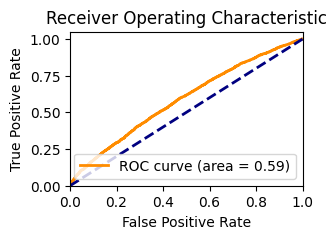

In [ ]:
# Compute imbalance_ratio
imbalance_ratio = (len(y) - sum(y)) / sum(y)

xgb_model = XGBClassifier(scale_pos_weight=imbalance_ratio, classrandom_state=100)
xgb_model.fit(X_train, y_train)

accuracy_report(xgb_model, X_train, X_test, y_train, y_test, ['no','yes'])

## RandomForestClassifier

Train Data:
-----------
Accuracy:  0.5844
ROC AUC Score:  0.6007
Classification Report:
              precision    recall  f1-score   support

          no       0.21      0.62      0.31     13138
         yes       0.90      0.58      0.70     74260

    accuracy                           0.58     87398
   macro avg       0.55      0.60      0.51     87398
weighted avg       0.79      0.58      0.64     87398

Confusion Matrix:
[[ 8199  4939]
 [31380 42880]]


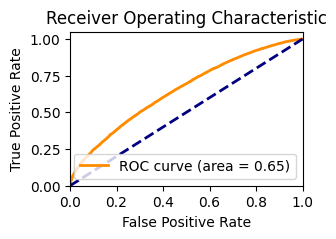

Test Data:
----------
Accuracy:  0.564
ROC AUC Score:  0.5621
Classification Report:
              precision    recall  f1-score   support

          no       0.19      0.56      0.29      3404
         yes       0.87      0.56      0.69     18446

    accuracy                           0.56     21850
   macro avg       0.53      0.56      0.49     21850
weighted avg       0.77      0.56      0.62     21850

Confusion Matrix:
[[ 1904  1500]
 [ 8026 10420]]


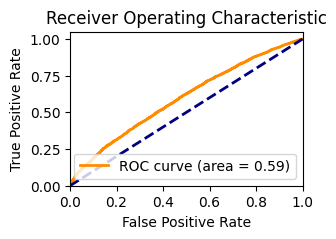

In [ ]:
rf_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=100
)
rf_model.fit(X_train, y_train)

accuracy_report(rf_model, X_train, X_test, y_train, y_test, ['no','yes'])

## Reactions from Model 2 Runs
We were able to improve Recall for our negative class for all of our models. Precision for the negative class decreased slightly in our Random Forest case, meaning that now we are getting more false positives for the negative class, however, F1 for the negative class improved for all models. So we saw an improvement across the board albeit modest.

We also see AUC ROC improving across the board. Initially close to 0.5 for all models, it is now close to 0.55 for all models. A modest imprivement but we are moving in the right direction.

After employing limiting parameters for Random Forest (n_estimators, max_depth, min_samples_split, min_samples_leaf) we see that we are no longer overfitting. We can tune these hyperparameters in future runs but these provide a good baseline to move forward with for now.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Model 3 Runs
#### Improvements to try:
- Transforming our continuous numerical features to reduce right-skew
- Scaling our continuous numerical features to mitigate biasing the models due to different scales.

I expect that both of these strategies may improve the Logistic Regression model. We will not use them for our two decision tree based models as neither of these two issues affect them and so altering the data may actually reduce their performance.

### Transforming data to reduce skew
This will be important for the Logistic Regression model as it assumes a more normal distribution. We will not apply this tranformations to the decision tree based models, Random Forest and XGBoost, as they are not affected by skewed data.

We can try different types of transformations and see which reduces the skew the most.

In [ ]:
from scipy.stats import boxcox, skew
from sklearn.preprocessing import PowerTransformer

train_data_transformed = train_data.copy()

for col in numerical_columns:
    # Original skewness
    original_skew = skew(train_data[col])

    # Log Transformation
    log_transformed = np.log1p(train_data[col])
    log_skew = skew(log_transformed)

    # Square Root Transformation
    sqrt_transformed = np.sqrt(train_data[col])
    sqrt_skew = skew(sqrt_transformed)

    # Cube Root Transformation
    cbrt_transformed = np.cbrt(train_data[col])
    cbrt_skew = skew(cbrt_transformed)

    # Box-Cox Transformation
    boxcox_transformed, _ = boxcox(train_data[col] + 1)
    boxcox_skew = skew(boxcox_transformed)

    # Yeo-Johnson Transformation
    pt = PowerTransformer(method='yeo-johnson')
    yj_transformed = pt.fit_transform(train_data[[col]])
    yj_skew = skew(yj_transformed.flatten())

    # Print skewness values
    print(col)
    print(f'Original Skewness: {original_skew}')
    print(f'Log Skewness: {log_skew}')
    print(f'Sqrt Skewness: {sqrt_skew}')
    print(f'Cbrt Skewness: {cbrt_skew}')
    print(f'Box-Cox Skewness: {boxcox_skew}')
    print(f'Yeo-Johnson Skewness: {yj_skew}')

    # Select the transformation with the lowest skewness
    transformations = {
        'log': (log_transformed, log_skew),
        'sqrt': (sqrt_transformed, sqrt_skew),
        'cbrt': (cbrt_transformed, cbrt_skew),
        'boxcox': (boxcox_transformed, boxcox_skew),
        'yeo-johnson': (yj_transformed.flatten(), yj_skew)
    }

    best_transformation = min(transformations, key=lambda x: abs(transformations[x][1]))
    print(f'Best transformation: {best_transformation} with skewness {transformations[best_transformation][1]}')
    print('')

    # Apply the best transformation to the original data
    train_data_transformed[col] = transformations[best_transformation][0]


teacher_number_of_previously_posted_projects
Original Skewness: 5.916205023351204
Log Skewness: 0.7655068374906877
Sqrt Skewness: 2.1594087077968944
Cbrt Skewness: 0.9155274803893119
Box-Cox Skewness: 0.15236051953404287
Yeo-Johnson Skewness: 0.15236054103716767
Best transformation: boxcox with skewness 0.15236051953404287

total_project_cost
Original Skewness: 5.779756769287675
Log Skewness: 0.2773317618921386
Sqrt Skewness: 1.7646603665202458
Cbrt Skewness: 1.127114741426629
Box-Cox Skewness: 0.011286205424231251
Yeo-Johnson Skewness: 0.011286277648209893
Best transformation: boxcox with skewness 0.011286205424231251



Box-Cox was the most successfull at reducing skew for both of our numerical columns. Let's inspect the data again now after the tranformations.

## Distribution After Transformation

       teacher_number_of_previously_posted_projects  total_project_cost
count                                     109248.00           109248.00
mean                                           1.01                4.08
std                                            0.80                0.32
min                                            0.00                3.42
25%                                            0.00                3.86
50%                                            0.94                4.08
75%                                            1.66                4.32
max                                            2.81                5.31


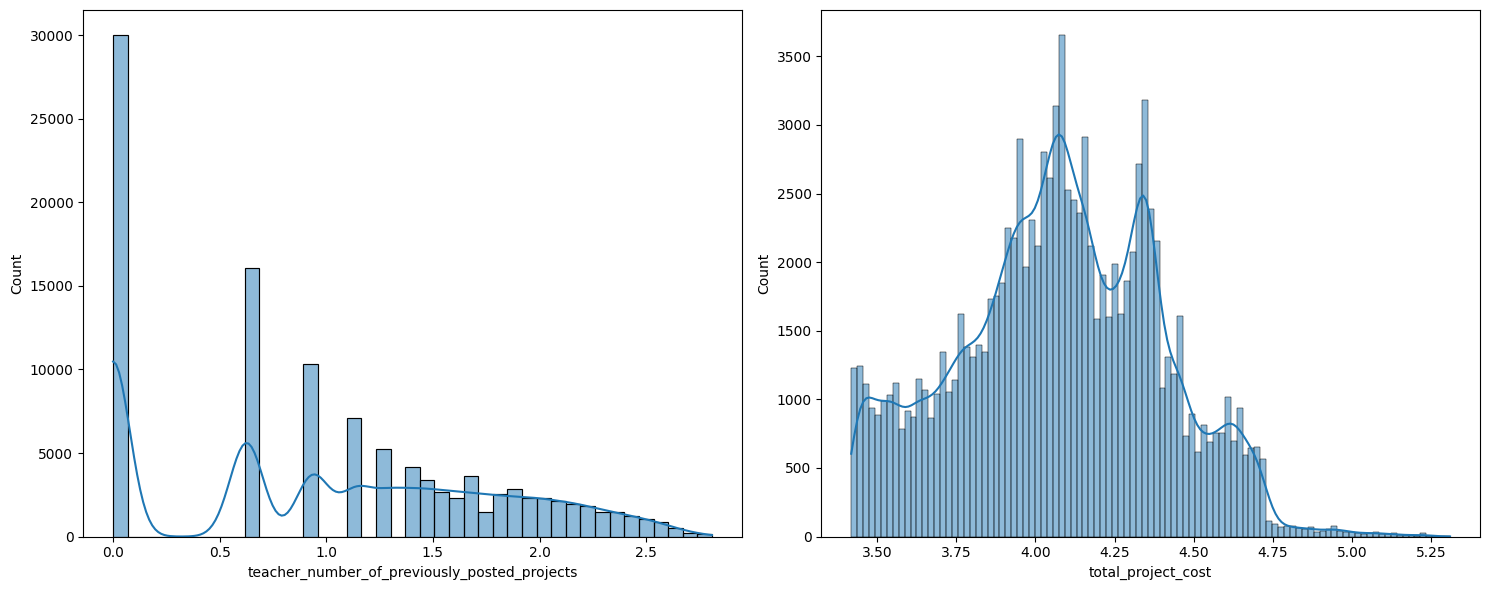

In [ ]:
print(train_data_transformed[numerical_columns].describe().round(2))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax=ax.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(data=train_data_transformed[col],ax=ax[i], kde=True)
plt.tight_layout()

We can see that our transformations have reduced the skews of both columns substantially, although they are both still slightly right skewed.

## Splitting transformed data

In [ ]:
X_transformed=train_data_transformed.drop('project_is_approved',axis=1)
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_transformed, y, test_size=0.20,random_state=100)

## Scaling Continuous Features
Given that our two continuous features have vastly different scales it is important to scale them to be similar. This will also be important for the Logistic Regression model that can be biased by continuous features with different scales.

We will not apply this tranformation for decision tree based models, Random Forest and XGBoost, as they are not affected by the scale of continuous features.

In [ ]:
scaler = StandardScaler()
X_train_transformed[numerical_columns] = scaler.fit_transform(X_train_transformed[numerical_columns])
X_test_transformed[numerical_columns] = scaler.transform(X_test_transformed[numerical_columns])

X_train_transformed[numerical_columns].describe()

teacher_number_of_previously_posted_projects  total_project_cost
count                                  8.739800e+04        8.739800e+04
mean                                  -1.089415e-17        2.315089e-15
std                                    1.000006e+00        1.000006e+00
min                                   -1.273582e+00       -2.049262e+00
25%                                   -1.273582e+00       -6.645348e-01
50%                                   -9.917026e-02        1.550671e-02
75%                                    8.141430e-01        7.471890e-01
max                                    2.248323e+00        3.846022e+00

## Distribution After Scaling

       teacher_number_of_previously_posted_projects  total_project_cost
count                                      87398.00            87398.00
mean                                          -0.00                0.00
std                                            1.00                1.00
min                                           -1.27               -2.05
25%                                           -1.27               -0.66
50%                                           -0.10                0.02
75%                                            0.81                0.75
max                                            2.25                3.85


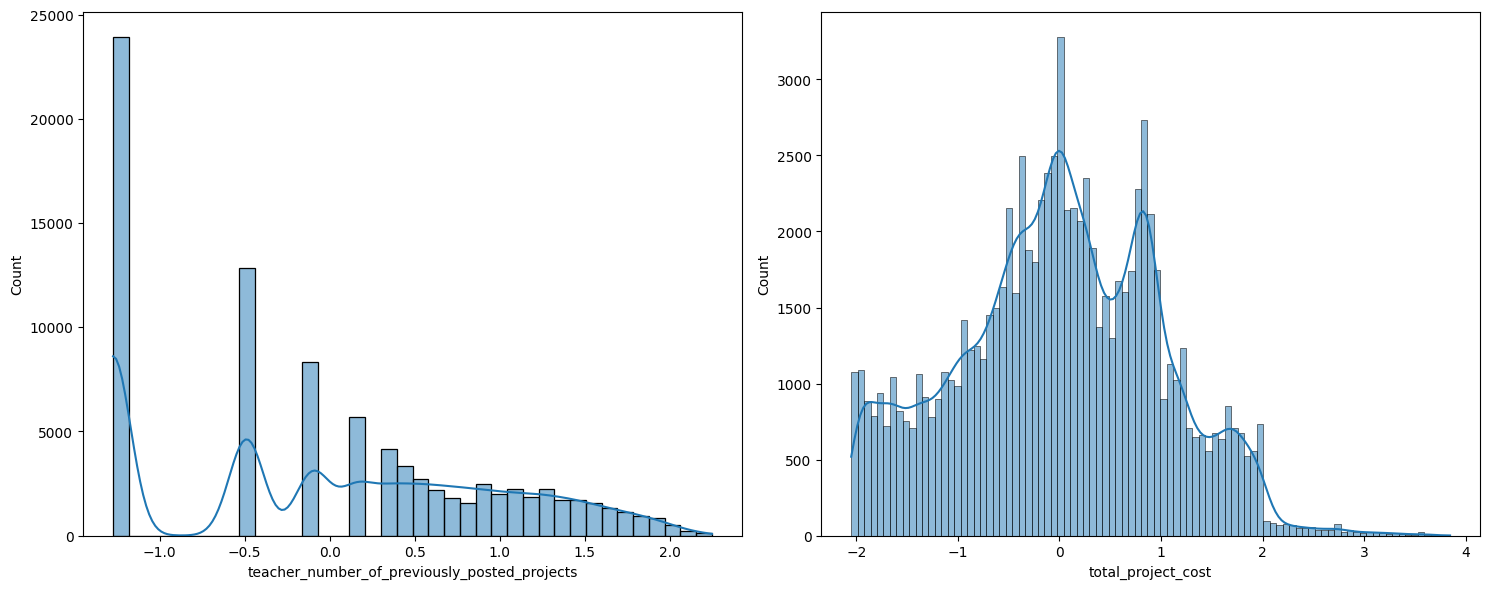

In [ ]:
print(X_train_transformed[numerical_columns].describe().round(2))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax=ax.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(data=X_train_transformed[col],ax=ax[i], kde=True)
plt.tight_layout()

## LogisticRegression

Train Data:
-----------
Accuracy:  0.5671
ROC AUC Score:  0.5689
Classification Report:
              precision    recall  f1-score   support

          no       0.19      0.57      0.28     13138
         yes       0.88      0.57      0.69     74260

    accuracy                           0.57     87398
   macro avg       0.54      0.57      0.49     87398
weighted avg       0.78      0.57      0.63     87398

Confusion Matrix:
[[ 7507  5631]
 [32203 42057]]


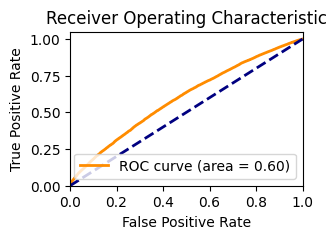

Test Data:
----------
Accuracy:  0.5596
ROC AUC Score:  0.5599
Classification Report:
              precision    recall  f1-score   support

          no       0.19      0.56      0.28      3404
         yes       0.87      0.56      0.68     18446

    accuracy                           0.56     21850
   macro avg       0.53      0.56      0.48     21850
weighted avg       0.77      0.56      0.62     21850

Confusion Matrix:
[[ 1907  1497]
 [ 8125 10321]]


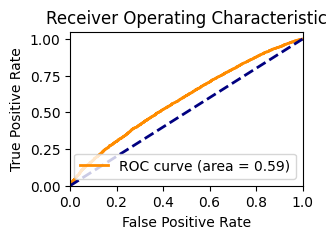

In [ ]:
log_reg_model = LogisticRegression(class_weight='balanced', random_state=100)
log_reg_model.fit(X_train_transformed, y_train_transformed)

accuracy_report(log_reg_model, X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed, ['no','yes'])

## Reactions to Model 3 Run
Our evaluation metrics suprisingly went slightly down for our Log Reg model after transforming and scaling our continuous numerical columns.

In the future I might try some other methods of transforming and scaling such as a simple log transform or a min-max scaler just to see if they have improved results although I wouldn't expect them to perform better.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Model Runs 4
#### Improvements to try:
- NLP

## TF-IDF Vectorization

We will combine the project title and all essay columns into one column on which we will perform TF-IDF Vectorization. We will fill any missing values (in essays 3 and 4) with empty strings. This will allows us to combine all the text we have for a given project and we will not have to throw away any data, but some projects will have less text available which is fine.

Since we now have two datasets, one with transformed continuous features and one without we will do this to both sets.

In [ ]:
# Concatenate text_columns_df with train_data
train_data = pd.concat([train_data, text_columns_df], axis=1)

# Handle missing values (fill NaNs in text columns with empty string)
train_data[text_columns] = train_data[text_columns].fillna('')

# Combine text columns into a single column for NLP
train_data['combined_text'] = train_data['project_title'] + ' ' + train_data['project_essay_1'] + ' ' + train_data['project_essay_2'] + ' ' + train_data['project_essay_3'] + ' ' + train_data['project_essay_4']

train_data.drop(["project_title", "project_essay_1", "project_essay_2", "project_essay_3", "project_essay_4", "project_resource_summary"], inplace=True, axis=1)

In [ ]:
# Concatenate text_columns_df with train_data
train_data_transformed = pd.concat([train_data_transformed, text_columns_df], axis=1)

# Handle missing values (fill NaNs in text columns with empty string)
train_data_transformed[text_columns] = train_data_transformed[text_columns].fillna('')

# Combine text columns into a single column for NLP
train_data_transformed['combined_text'] = train_data_transformed['project_title'] + ' ' + train_data_transformed['project_essay_1'] + ' ' + train_data_transformed['project_essay_2'] + ' ' + train_data_transformed['project_essay_3'] + ' ' + train_data_transformed['project_essay_4']

train_data_transformed.drop(["project_title", "project_essay_1", "project_essay_2", "project_essay_3", "project_essay_4", "project_resource_summary"], inplace=True, axis=1)

### Splitting training and test data

In [ ]:
X=train_data.drop('project_is_approved',axis=1)
X_transformed=train_data_transformed.drop('project_is_approved',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=100)
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_transformed, y, test_size=0.20,random_state=100)

## TfidfVectorizer
We're transforming our combined free text column into a matrix where it is represented by the TF-IDF scores of the most important terms.

We will limit the number of features (i.e., the number of terms) in the resulting TF-IDF matrix to the top 1000 terms. The terms are selected based on their TF-IDF scores across the entire corpus. Essentially, only the 1000 most important terms (by TF-IDF score) are retained.


In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data
X_train_tfidf = tfidf.fit_transform(X_train['combined_text'])
X_test_tfidf = tfidf.transform(X_test['combined_text'])

# Convert TF-IDF matrix to dataframe
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Reset index for concatenation
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Concatenate TF-IDF features with other features
X_train = pd.concat([X_train.drop(columns=['combined_text']), X_train_tfidf_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['combined_text']), X_test_tfidf_df], axis=1)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data
X_train_transformed_tfidf = tfidf.fit_transform(X_train_transformed['combined_text'])
X_test_transformed_tfidf = tfidf.transform(X_test_transformed['combined_text'])

# Convert TF-IDF matrix to dataframe
X_train_transformed_tfidf_df = pd.DataFrame(X_train_transformed_tfidf.toarray(), columns=tfidf.get_feature_names_out())
X_test_transformed_tfidf_df = pd.DataFrame(X_test_transformed_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Reset index for concatenation
X_train_transformed = X_train_transformed.reset_index(drop=True)
X_test_transformed = X_test_transformed.reset_index(drop=True)

# Concatenate TF-IDF features with other features
X_train_transformed = pd.concat([X_train_transformed.drop(columns=['combined_text']), X_train_transformed_tfidf_df], axis=1)
X_test_transformed = pd.concat([X_test_transformed.drop(columns=['combined_text']), X_test_transformed_tfidf_df], axis=1)

X_train_transformed.columns = X_train_transformed.columns.astype(str)
X_test_transformed.columns = X_test_transformed.columns.astype(str)

### Scaling Continuous Features (Same As Before)

In [ ]:
scaler = StandardScaler()
X_train_transformed[numerical_columns] = scaler.fit_transform(X_train_transformed[numerical_columns])
X_test_transformed[numerical_columns] = scaler.transform(X_test_transformed[numerical_columns])

In [ ]:
X_train_transformed.head()

teacher_number_of_previously_posted_projects  total_project_cost  \
0                                      1.559422           -0.392237   
1                                     -0.099170            1.012885   
2                                     -1.273582           -1.082227   
3                                      0.576907            0.270637   
4                                      1.676127           -1.822621   

   Financial Literacy  Health & Life Science  Nutrition Education  \
0                   0                      0                    0   
1                   0                      0                    0   
2                   0                      0                    0   
3                   0                      0                    0   
4                   0                      0                    0   

   Foreign Languages  Economics  Team Sports  Literacy & Language  \
0                  0          0            0                    1   
1                  0          0            0                    1   
2                  0          0            0                    0   
3                  0          0            0                    1   
4                  0          0            0                    0   

   Environmental Science  Community Service  Math & Science  Care & Hunger  \
0                      0                  0               1              0   
1                      0                  0               1              0   
2                      0                  0               0              0   
3                      0                  0               1              0   
4                      0                  0               1              0   

   Special Needs  Music & The Arts  Civics & Government  ESL  \
0              0                 0                    0    0   
1              0                 0                    0    0   
2              0                 1                    0    0   
3              0                 0                    0    0   
4              0                 0                    0    0   

   Applied Learning  Parent Involvement  Extracurricular  Health & Sports  \
0                 0                   0                0                0   
1                 0                   0                0                0   
2                 0                   0                0                0   
3                 0                   0                0                0   
4                 0                   0                0                0   

   Character Education  History & Civics  teacher_prefix_Mr.  \
0                    0                 0               False   
1                    0                 0               False   
2                    0                 0               False   
3                    0                 0               False   
4                    0                 0               False   

   teacher_prefix_Mrs.  teacher_prefix_Ms.  teacher_prefix_Teacher  year_2017  \
0                 True               False                   False      False   
1                 True               False                   False      False   
2                False                True                   False       True   
3                 True               False                   False      False   
4                 True               False                   False      False   

   month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0    False    False    False    False    False    False    False     True   
1    False    False    False    False     True    False    False    False   
2    False    False    False    False    False    False    False    False   
3    False    False    False    False    False    False    False    False   
4    False    False    False    False    False    False    False    False   

   month_10  month_11  month_12  school_state_AL  school_state_AR  \
0     False     False    

In [ ]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87398 entries, 0 to 87397
Columns: 1092 entries, teacher_number_of_previously_posted_projects to young
dtypes: bool(69), float64(1002), int64(21)
memory usage: 687.9 MB


### Added Features
Note as shown above we have added 1000 features with TfidfVectorizer

## LogisticRegression

/Users/Ben/anaconda3/envs/conda_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Data:
-----------
Accuracy:  0.6778
ROC AUC Score:  0.6848
Classification Report:
              precision    recall  f1-score   support

          no       0.27      0.69      0.39     13138
         yes       0.93      0.67      0.78     74260

    accuracy                           0.68     87398
   macro avg       0.60      0.68      0.59     87398
weighted avg       0.83      0.68      0.72     87398

Confusion Matrix:
[[ 9129  4009]
 [24148 50112]]


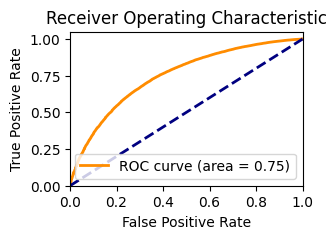

Test Data:
----------
Accuracy:  0.6671
ROC AUC Score:  0.6674
Classification Report:
              precision    recall  f1-score   support

          no       0.27      0.67      0.38      3404
         yes       0.92      0.67      0.77     18446

    accuracy                           0.67     21850
   macro avg       0.59      0.67      0.58     21850
weighted avg       0.82      0.67      0.71     21850

Confusion Matrix:
[[ 2273  1131]
 [ 6143 12303]]


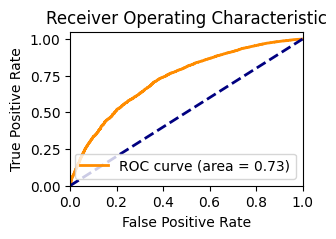

In [ ]:
log_reg_model = LogisticRegression(class_weight='balanced', random_state=100)
log_reg_model.fit(X_train_transformed, y_train_transformed)

accuracy_report(log_reg_model, X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed, ['no','yes'])

## XGBClassifier

/Users/Ben/anaconda3/envs/conda_env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [06:27:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "classrandom_state" } are not used.

  warnings.warn(smsg, UserWarning)


Train Data:
-----------
Accuracy:  0.7858
ROC AUC Score:  0.8087
Classification Report:
              precision    recall  f1-score   support

          no       0.40      0.84      0.54     13138
         yes       0.97      0.78      0.86     74260

    accuracy                           0.79     87398
   macro avg       0.68      0.81      0.70     87398
weighted avg       0.88      0.79      0.81     87398

Confusion Matrix:
[[11054  2084]
 [16637 57623]]


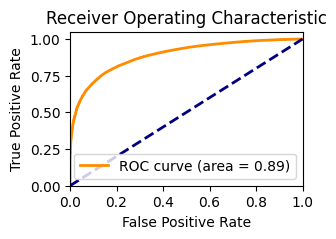

Test Data:
----------
Accuracy:  0.7095
ROC AUC Score:  0.6581
Classification Report:
              precision    recall  f1-score   support

          no       0.29      0.58      0.38      3404
         yes       0.91      0.73      0.81     18446

    accuracy                           0.71     21850
   macro avg       0.60      0.66      0.60     21850
weighted avg       0.81      0.71      0.74     21850

Confusion Matrix:
[[ 1986  1418]
 [ 4929 13517]]


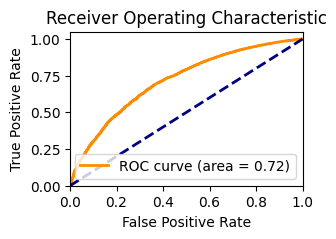

In [ ]:
# Compute imbalance_ratio
imbalance_ratio = (len(y) - sum(y)) / sum(y)

xgb_model = XGBClassifier(scale_pos_weight=imbalance_ratio, classrandom_state=100)
xgb_model.fit(X_train, y_train)

accuracy_report(xgb_model, X_train, X_test, y_train, y_test, ['no','yes'])

## RandomForestClassifier

Train Data:
-----------
Accuracy:  0.7158
ROC AUC Score:  0.7154
Classification Report:
              precision    recall  f1-score   support

          no       0.31      0.71      0.43     13138
         yes       0.93      0.72      0.81     74260

    accuracy                           0.72     87398
   macro avg       0.62      0.72      0.62     87398
weighted avg       0.84      0.72      0.75     87398

Confusion Matrix:
[[ 9391  3747]
 [21088 53172]]


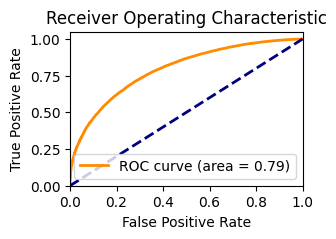

Test Data:
----------
Accuracy:  0.677
ROC AUC Score:  0.6475
Classification Report:
              precision    recall  f1-score   support

          no       0.26      0.60      0.37      3404
         yes       0.90      0.69      0.78     18446

    accuracy                           0.68     21850
   macro avg       0.58      0.65      0.58     21850
weighted avg       0.80      0.68      0.72     21850

Confusion Matrix:
[[ 2058  1346]
 [ 5712 12734]]


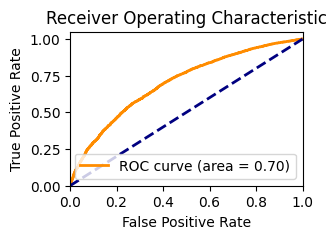

In [ ]:
rf_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=100
)
rf_model.fit(X_train, y_train)

accuracy_report(rf_model, X_train, X_test, y_train, y_test, ['no','yes'])

# Most Important Feature Report

## Logistic Regression Model

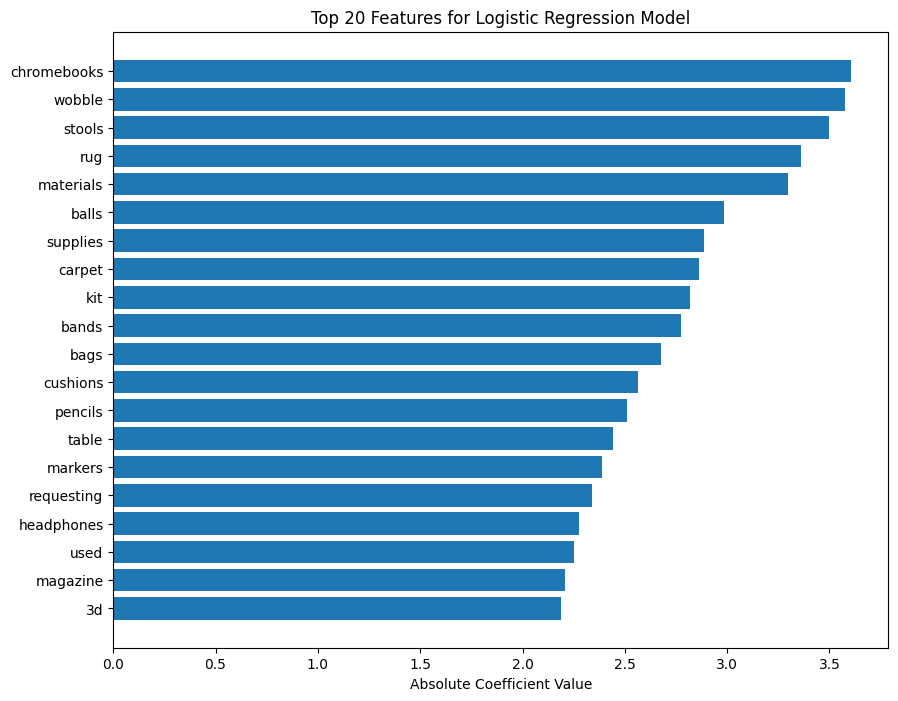

In [ ]:
# Get the feature names
feature_names = X_train.columns

# Get the coefficients and their absolute values
coefficients = log_reg_model.coef_[0]
abs_coefficients = abs(coefficients)

# Create a DataFrame to hold feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': abs_coefficients
})

# Sort by absolute coefficient
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Absolute Coefficient'][:20])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 20 Features for Logistic Regression Model')
plt.gca().invert_yaxis()
plt.show()

## Random Forest Model

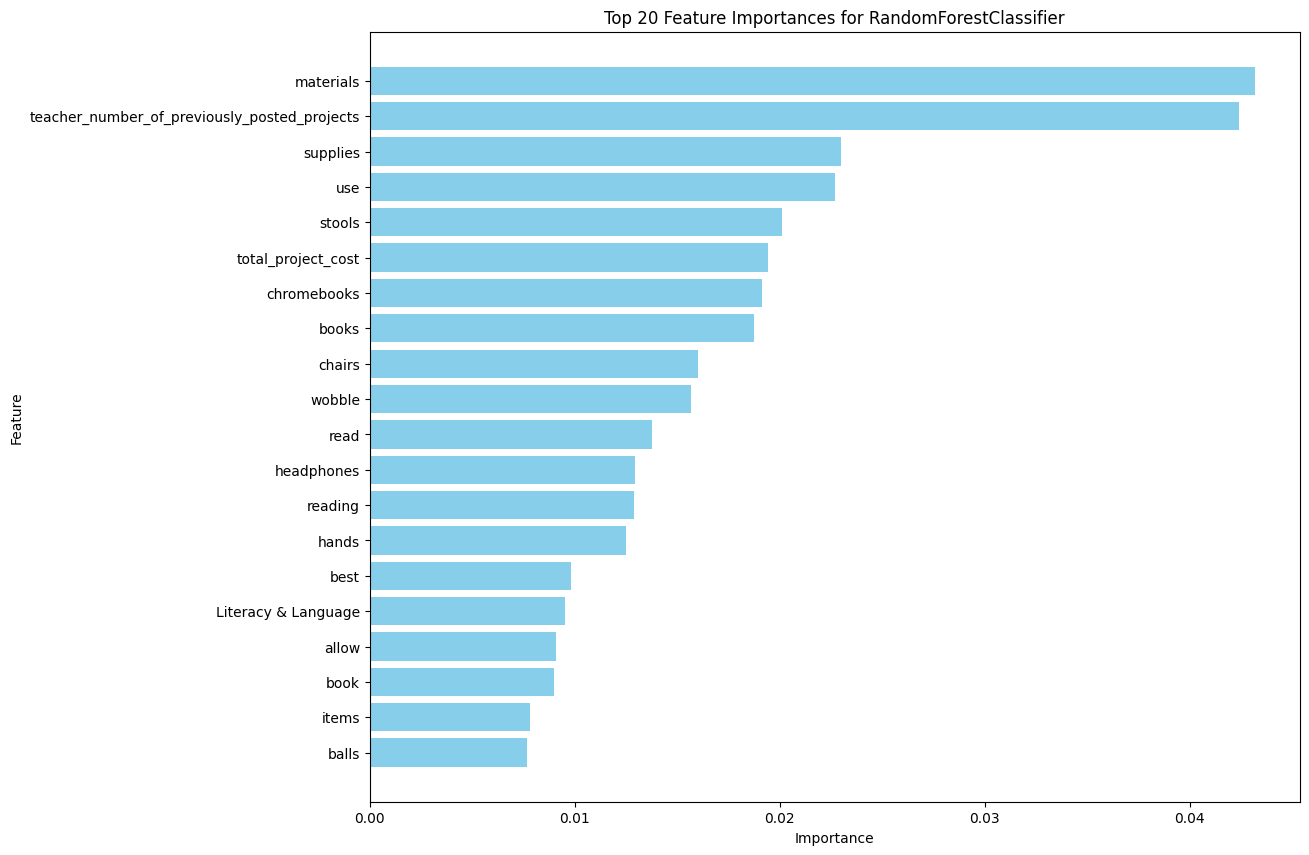

In [57]:
# Extract feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance and get the top 20 features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot feature importances
plt.figure(figsize=(12, 10))  # Adjust the height for better visualization
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances for RandomForestClassifier')
plt.gca().invert_yaxis()
plt.show()


Interestingly, for the Log Reg model the top 20 features in terms of importance were all text terms involved in the NLP strategy. However, for the Random Forest model the two continuous numerical features were also very important. This is particularly interesting given that both models achieved similar results.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Conclusions & Future Plans

## Conclusions

All of the models produced results that were in the same ball park of each other. The best model was the Logistic Regression model by a slim margin with an AUC ROC of 0.67 and an F1 score of 0.38. XGBoost achieved AUC ROC of 0.66 and F1 of 0.38. Random Forest acheived AUC ROC of 0.65 and F1 of 0.37.

The NLP strategy was able to significantly increase the results of all 3 models, although the results still have much room for improvement. None of the cateogrical features had a large impact. The features that had the largest impact were the text terms derived from NLP and the continuous numerical features. The transformation and scaling techniques I used did not make any improvement to the Logistic Regression model which was surprising. I would try some other techniques given more time.

I would say these resuts are still too inaccurate to be used in production. Further improvement will have to be made to acheive a model that could be used in production to predict whether a given project proposal is likely to be approved. In it's current state, it will not prove a useful product for users, however, here are some future plans to improve model performance in hopes of making it production ready.

## Future Plans
There are several things I would like to do with more time. These ideas include:
- Trying other NLP strategies such as Word2Vec Embeddings and BERT Transformation
- Tuning hyperparameters and using K-Fold performance
- Trying different transformation and scaling techniques on the continuous features
- Tring a K-Nearest Neighbors Model
- Trying PCA
- Try ordinal encoding the grade category

## Other NLP Strategies
Both Word2Vec Embeddings and BERT Transformation require a significant amoutn of time to process with this dataset, particularly BERT Transformation. I would like to use a cloud service with a dedicated GPU, possibly combined with sub-sampling or batching techniques to lower processing time.

## Hyperparam tuning
I would like to do some hyperparameter tuning on all the models and on the TfidfVectorizer. Given how long it can take to do hyperparameter tuning particularly for the more intense models like XGBoost, I didn't have a chance to run all the permutations I would like. here are some examples of hyperparameter tuning and K-fold performance evaluation I would perform given more time:

### Logistic Regression Model

In [ ]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [500, 1000, 2000]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='roc_auc'
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

### XGBoost Model

In [ ]:
# Compute class weights
class_weights = {0: (len(y) - sum(y)) / sum(y), 1: 1.0}

# Train the model with class weights
xgb_model = XGBClassifier(scale_pos_weight=class_weights[0], use_label_encoder=False, eval_metric='logloss', random_state=100)
xgb_parameters = {
    'n_estimators':[50,100,200],
   'max_depth':[2,3,4],
    'learning_rate':[0.01,0.1,0.2,0.3]
}
xgb_search = GridSearchCV(xgb_model,xgb_parameters,cv=5,scoring='roc_auc')
xgb_search.fit(X_train, y_train)

best_model = xgb_search.best_estimator_
best_params = xgb_search.best_params_
prediction = best_model.predict(X_test)
print("best parameters:",best_params)

accuracy_report(best_model, ['no','yes'])

### Random Forest Model

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=100)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # You can choose other scoring metrics
    n_jobs=-1,  # Use all available cores
    verbose=2  # Verbose output during the search
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

### K-Fold Performance

In [ ]:
# evaluate the model
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(xgb_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
